# L&T Vehicle Loan Default Prediction


## About Dataset
Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default. A financial institution has hired you to accurately predict the probability of loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date.






Following Information regarding the loan and loanee are provided in the datasets:
- Loanee Information (Demographic data like age, Identity proof etc.)
- Loan Information (Disbursal details, loan to value ratio etc.)
- Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.)
Doing so will ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimising the default rates.

#### Dataset Link: https://www.kaggle.com/datasets/mamtadhaker/lt-vehicle-loan-default-prediction

### Importing libraries

In [300]:
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action="ignore")

from glob import glob #library that helps us search for files
import scipy
import random
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from category_encoders import OneHotEncoder,TargetEncoder,OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression, Lasso, ElasticNet

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix,roc_auc_score, roc_curve, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, PowerTransformer,LabelEncoder, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.feature_selection import RFE, SelectKBest, f_regression, SelectFromModel
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from scipy.special import inv_boxcox
from sklearn.linear_model import QuantileRegressor
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier

#deep learning models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
pd.pandas.set_option('display.max_rows',None)
pd.pandas.set_option('display.max_columns',None)
from sklearn.feature_selection import VarianceThreshold
#pd.options.display.float_format = '{:20,.2f}'.format
from sklearn import set_config
set_config(transform_output = 'pandas')

#deep learning model
from sklearn.neural_network import MLPClassifier

#saving model
import pickle

In [2]:
data_dictionary = pd.read_csv("C:/Users/Oamen/OneDrive/Documents/DATASETS/ml_datasets_to_do/ltv_loan_default/data_dictionary.csv")
data_dictionary

Unnamed: 0                        Variable Name  \
0            0                             UniqueID   
1            1                         loan_default   
2            2                     disbursed_amount   
3            3                           asset_cost   
4            4                                  ltv   
5            5                            branch_id   
6            6                          supplier_id   
7            7                      manufacturer_id   
8            8                      Current_pincode   
9            9                        Date.of.Birth   
10          10                      Employment.Type   
11          11                        DisbursalDate   
12          12                             State_ID   
13          13                     Employee_code_ID   
14          14                    MobileNo_Avl_Flag   
15          15                          Aadhar_flag   
16          16                             PAN_flag   
17          17                         VoterID_flag   
18          18                         Driving_flag   
19          19                        Passport_flag   
20          20                    PERFORM_CNS.SCORE   
21          21        PERFORM_CNS.SCORE.DESCRIPTION   
22          22                      PRI.NO.OF.ACCTS   
23          23                     PRI.ACTIVE.ACCTS   
24          24                    PRI.OVERDUE.ACCTS   
25          25                  PRI.CURRENT.BALANCE   
26          26                PRI.SANCTIONED.AMOUNT   
27          27                 PRI.DISBURSED.AMOUNT   
28          28                      SEC.NO.OF.ACCTS   
29          29                     SEC.ACTIVE.ACCTS   
30          30                    SEC.OVERDUE.ACCTS   
31          31                  SEC.CURRENT.BALANCE   
32          32                SEC.SANCTIONED.AMOUNT   
33          33                 SEC.DISBURSED.AMOUNT   
34          34                   PRIMARY.INSTAL.AMT   
35          35                       SEC.INSTAL.AMT   
36          36         NEW.ACCTS.IN.LAST.SIX.MONTHS   
37          37  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS   
38          38                     AVERAGE.ACCT.AGE   
39          39                CREDIT.HISTORY.LENGTH   
40          40                      NO.OF_INQUIRIES   

                                          Description  \
0                            Identifier for customers   
1        Payment default in the first EMI on due date   
2                            Amount of Loan disbursed   
3                                   Cost of the Asset   
4                          Loan to Value of the asset   
5                 Branch where the loan was disbursed   
6         Vehicle Dealer where the loan was disbursed   
7         Vehicle manufacturer(Hero, Honda, TVS etc.)   
8                     Current pincode of the customer   
9                       Date of birth of the customer   
10  Employment Type of the customer (Salaried/Self...   
11                               Date of disbursement   
12                              State of disbursement   
13  Employee of the organization who logged the di...   
14  if Mobile no. was shared by the customer then ...   
15  if aadhar was shared by the customer then flag...   
16  if pan was shared by the customer then flagged...   
17  if voter  was shared by the customer then flag...   
18  if DL was shared by the customer then flagged ...   
19  if passport was shared by the customer then fl...   
20                                       Bureau Score   
21                           Bureau score description   
22  count of total loans taken by the customer at ...   
23  count of active loans taken by the customer at...   
24  count of default accounts at the time of disbu...   
25  total Principal outstanding amount of the acti...   
26  total amount that was sanctioned for all the l...   
27  total amount that was disbursed for all the lo...   
28  count of total loans taken by the cu

In [3]:
train = pd.read_csv("C:/Users/Oamen/OneDrive/Documents/DATASETS/ml_datasets_to_do/ltv_loan_default/train.csv")
train.head()

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
0               45                1441      01-01-84        Salaried   
1               45                1502      31-07-85   Self employed   
2               45                1497      24-08-85   Self employed   
3               45                1501      30-12-93   Self employed   
4               45                1495      09-12-77   Self employed   

  DisbursalDate  State_ID  Employee_code_ID  MobileNo_Avl_Flag  Aadhar_flag  \
0      03-08-18         6              1998                  1            1   
1      26-09-18         6              1998                  1            1   
2      01-08-18         6              1998                  1            1   
3      26-10-18         6              1998                  1            1   
4      26-09-18         6              1998                  1            1   

   PAN_flag  VoterID_flag  Driving_flag  Passport_flag  PERFORM_CNS.SCORE  \
0         0             0             0              0                  0   
1         0             0             0              0                598   
2         0             0             0              0                  0   
3         0             0             0              0                305   
4         0             0             0              0                  0   

  PERFORM_CNS.SCORE.DESCRIPTION  PRI.NO.OF.ACCTS  PRI.ACTIVE.ACCTS  \
0   No Bureau History Available                0                 0   
1                 I-Medium Risk                1                 1   
2   No Bureau History Available                0                 0   
3              L-Very High Risk                3                 0   
4   No Bureau History Available                0                 0   

   PRI.OVERDUE.ACCTS  PRI.CURRENT.BALANCE  PRI.SANCTIONED.AMOUNT  \
0                  0                    0                      0   
1                  1                27600                  50200   
2                  0                    0                      0   
3                  0                    0                      0   
4                  0                    0                      0   

   PRI.DISBURSED.AMOUNT  SEC.NO.OF.ACCTS  SEC.ACTIVE.ACCTS  SEC.OVERDUE.ACCTS  \
0                     0                0                 0                  0   
1                 50200                0                 0                  0   
2                     0                0                 0                  0   
3                     0                0                 0                  0   
4                     0                0                 0                  0   

   SEC.CURRENT.BALANCE  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  \
0                    0                      0                     0   
1                    0                      0                     0   
2                    0                      0                     0   
3                    0                      0                     0   
4                    0                      0                     0   

   PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

   D

In [4]:
oos = pd.read_csv("C:/Users/Oamen/OneDrive/Documents/DATASETS/ml_datasets_to_do/ltv_loan_default/test.csv")
oos.head()

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    655269             53478       63558  86.54         67        22807   
1    723482             55513       63163  89.45         67        22807   
2    758529             65282       84320  79.93         78        23135   
3    763449             46905       63896  76.58         78        17014   
4    708663             51428       63896  86.08         78        17014   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
0               45                1497      01-01-74        Salaried   
1               45                1497      20-05-85   Self employed   
2               86                2071      14-10-95        Salaried   
3               45                2070      01-06-73   Self employed   
4               45                2069      01-06-72        Salaried   

  DisbursalDate  State_ID  Employee_code_ID  MobileNo_Avl_Flag  Aadhar_flag  \
0      03-11-18         6              1998                  1            1   
1      20-11-18         6              1998                  1            1   
2      29-11-18         4              1646                  1            1   
3      29-11-18         4              1646                  1            1   
4      17-11-18         4              1646                  1            1   

   PAN_flag  VoterID_flag  Driving_flag  Passport_flag  PERFORM_CNS.SCORE  \
0         0             0             0              0                  0   
1         0             0             0              0                749   
2         1             0             0              0                  0   
3         0             0             0              0                 14   
4         0             0             0              0                  0   

  PERFORM_CNS.SCORE.DESCRIPTION  PRI.NO.OF.ACCTS  PRI.ACTIVE.ACCTS  \
0   No Bureau History Available                0                 0   
1               C-Very Low Risk                2                 1   
2   No Bureau History Available                0                 0   
3  Not Scored: Only a Guarantor                1                 1   
4   No Bureau History Available                0                 0   

   PRI.OVERDUE.ACCTS  PRI.CURRENT.BALANCE  PRI.SANCTIONED.AMOUNT  \
0                  0                    0                      0   
1                  0                43898                  48780   
2                  0                    0                      0   
3                  1               132480                 255000   
4                  0                    0                      0   

   PRI.DISBURSED.AMOUNT  SEC.NO.OF.ACCTS  SEC.ACTIVE.ACCTS  SEC.OVERDUE.ACCTS  \
0                     0                0                 0                  0   
1                 48780                0                 0                  0   
2                     0                0                 0                  0   
3                255000                0                 0                  0   
4                     0                0                 0                  0   

   SEC.CURRENT.BALANCE  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  \
0                    0                      0                     0   
1                    0                      0                     0   
2                    0                      0                     0   
3                    0                      0                     0   
4                    0                      0                     0   

   PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                   0               0                             0   
1                5605               0                             1   
2                   0               0                             0   
3                   0               0                             0   
4                   0               0                             0   

   D

In [5]:
train.shape

(233154, 41)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

## Split Data

In [7]:
full_train, test = train_test_split(train, test_size = 0.2, random_state = 0)
reduced_train, validation = train_test_split(full_train, test_size = 0.2, random_state = 0)

## Data Exploration

In [8]:
reduced_train.shape

(149218, 41)

For faster EDA and exploration, take a random sample of dataset.

In [9]:
df = reduced_train.sample(50000)

### Duplicate data

In [10]:
print(f'Number of duplicates: {len(df[df.duplicated()])}')

Number of duplicates: 0


### White spaces

####  - In columns

In [11]:
[column for column in df.columns if column.startswith(' ') or column.endswith(' ') or ' ' in column]

[]

#### - In rows

In [12]:
for column in df.columns:
    
    empty = len(df[df[column] == ' '])
    
    if empty>0:
        print(f'{column.capitalize()}: True')
    
    print(f'{column.capitalize()}: False')

Uniqueid: False
Disbursed_amount: False
Asset_cost: False
Ltv: False
Branch_id: False
Supplier_id: False
Manufacturer_id: False
Current_pincode_id: False
Date.of.birth: False
Employment.type: False
Disbursaldate: False
State_id: False
Employee_code_id: False
Mobileno_avl_flag: False
Aadhar_flag: False
Pan_flag: False
Voterid_flag: False
Driving_flag: False
Passport_flag: False
Perform_cns.score: False
Perform_cns.score.description: False
Pri.no.of.accts: False
Pri.active.accts: False
Pri.overdue.accts: False
Pri.current.balance: False
Pri.sanctioned.amount: False
Pri.disbursed.amount: False
Sec.no.of.accts: False
Sec.active.accts: False
Sec.overdue.accts: False
Sec.current.balance: False
Sec.sanctioned.amount: False
Sec.disbursed.amount: False
Primary.instal.amt: False
Sec.instal.amt: False
New.accts.in.last.six.months: False
Delinquent.accts.in.last.six.months: False
Average.acct.age: False
Credit.history.length: False
No.of_inquiries: False
Loan_default: False


### Null values

In [13]:
total = np.product(df.shape)
nulls = df.isnull().sum().sum()

print(f'Percentage of null values in random sample: {(nulls/total) * 100}%')

Percentage of null values in random sample: 0.08195121951219513%


In [14]:
df.isnull().mean()

UniqueID                               0.0000
disbursed_amount                       0.0000
asset_cost                             0.0000
ltv                                    0.0000
branch_id                              0.0000
supplier_id                            0.0000
manufacturer_id                        0.0000
Current_pincode_ID                     0.0000
Date.of.Birth                          0.0000
Employment.Type                        0.0336
DisbursalDate                          0.0000
State_ID                               0.0000
Employee_code_ID                       0.0000
MobileNo_Avl_Flag                      0.0000
Aadhar_flag                            0.0000
PAN_flag                               0.0000
VoterID_flag                           0.0000
Driving_flag                           0.0000
Passport_flag                          0.0000
PERFORM_CNS.SCORE                      0.0000
PERFORM_CNS.SCORE.DESCRIPTION          0.0000
PRI.NO.OF.ACCTS                   

In [15]:
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        1680
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

### Univariate Analysis and cardinality of categorical columns

In [16]:
categorical_columns = df.select_dtypes('O').drop(['Date.of.Birth', 'DisbursalDate'], axis=1)

In [17]:
for column in categorical_columns:
    
    print(f'Number of unique values in {column}: {df[column].nunique()}')
    print()
    
    print(f'Unique values in {column}: {df[column].unique()}')
    print()
    
    print(f'Frequency of Unique values in {column}: {df[column].value_counts(normalize=True)}')
    print()
    
    print('--------------------------------------------------------------------------------------')

Number of unique values in Employment.Type: 2

Unique values in Employment.Type: ['Salaried' nan 'Self employed']

Frequency of Unique values in Employment.Type: Employment.Type
Self employed    0.565294
Salaried         0.434706
Name: proportion, dtype: float64

--------------------------------------------------------------------------------------
Number of unique values in PERFORM_CNS.SCORE.DESCRIPTION: 20

Unique values in PERFORM_CNS.SCORE.DESCRIPTION: ['Not Scored: Sufficient History Not Available'
 'No Bureau History Available'
 'Not Scored: No Updates available in last 36 months' 'C-Very Low Risk'
 'Not Scored: No Activity seen on the customer (Inactive)'
 'M-Very High Risk' 'A-Very Low Risk' 'H-Medium Risk' 'J-High Risk'
 'K-High Risk' 'E-Low Risk' 'B-Very Low Risk' 'F-Low Risk'
 'D-Very Low Risk' 'I-Medium Risk'
 'Not Scored: Not Enough Info available on the customer'
 'Not Scored: Only a Guarantor' 'G-Low Risk' 'L-Very High Risk'
 'Not Scored: More than 50 active Accounts fou

Frequency of Unique values in CREDIT.HISTORY.LENGTH: CREDIT.HISTORY.LENGTH
0yrs 0mon      0.51140
0yrs 6mon      0.02112
2yrs 1mon      0.02040
0yrs 7mon      0.01774
2yrs 0mon      0.01602
1yrs 0mon      0.01484
1yrs 1mon      0.01264
0yrs 11mon     0.01146
0yrs 8mon      0.01062
1yrs 11mon     0.01060
0yrs 9mon      0.01024
0yrs 10mon     0.00996
0yrs 4mon      0.00984
1yrs 2mon      0.00946
1yrs 3mon      0.00922
1yrs 6mon      0.00914
1yrs 7mon      0.00858
0yrs 3mon      0.00854
0yrs 5mon      0.00842
1yrs 10mon     0.00806
0yrs 2mon      0.00794
1yrs 4mon      0.00792
1yrs 9mon      0.00788
0yrs 1mon      0.00786
1yrs 5mon      0.00760
2yrs 2mon      0.00754
3yrs 0mon      0.00698
1yrs 8mon      0.00690
2yrs 11mon     0.00686
3yrs 1mon      0.00684
2yrs 6mon      0.00682
2yrs 7mon      0.00610
2yrs 4mon      0.00580
2yrs 5mon      0.00576
2yrs 3mon      0.00574
3yrs 2mon      0.00544
2yrs 8mon      0.00544
2yrs 10mon     0.00534
2yrs 9mon      0.00534
3yrs 3mon      0.00446
4yrs 

### Univariate Analysis and distribution of numerical columns

In [18]:
nums_to_drop = ['loan_default', 'Current_pincode_ID', 'supplier_id', 
                'branch_id','UniqueID','manufacturer_id','State_ID','Employee_code_ID']

In [19]:
numerical_columns = df.select_dtypes('number').drop(nums_to_drop, axis=1)

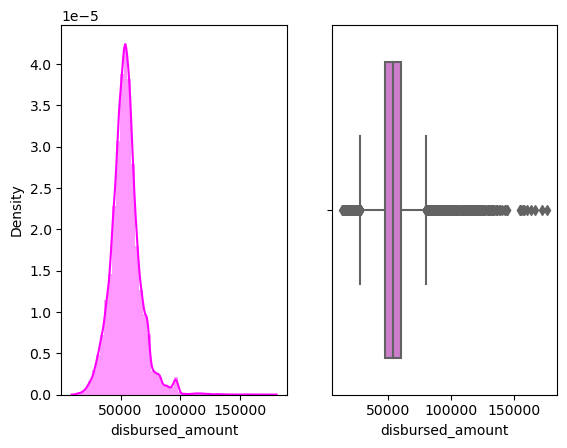

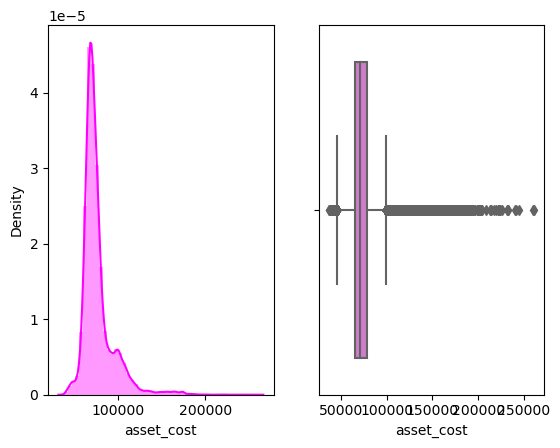

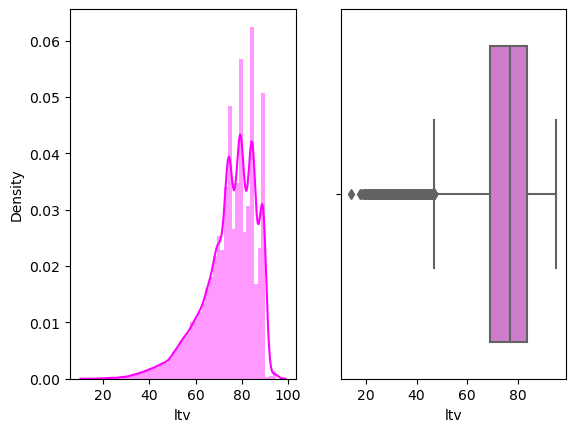

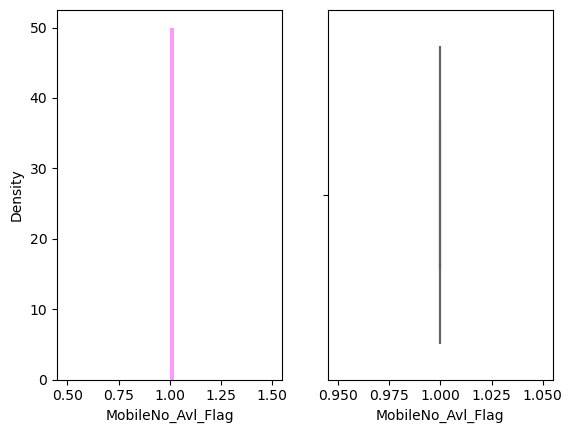

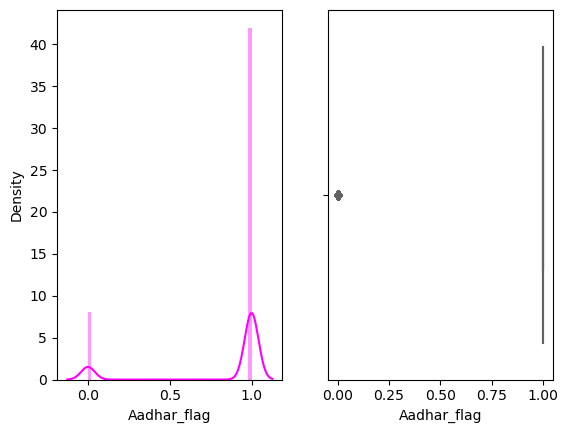

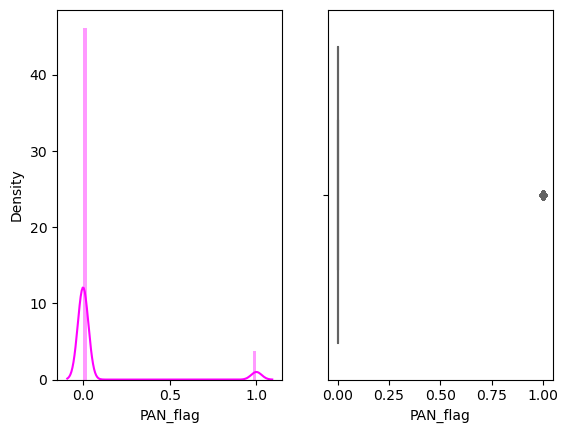

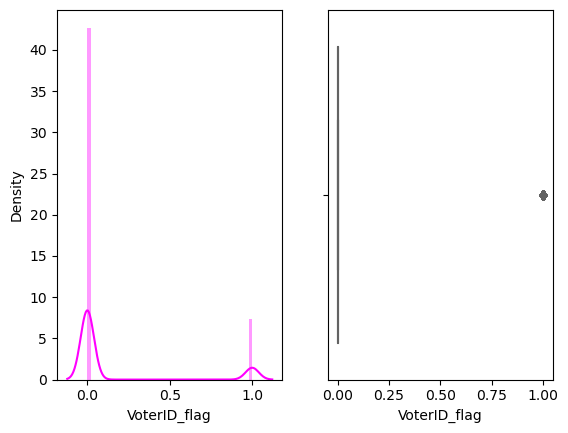

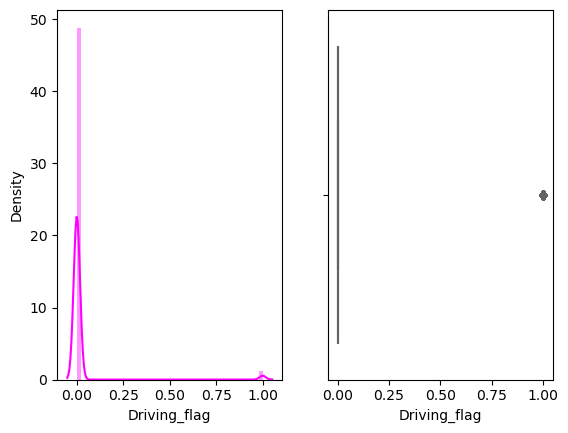

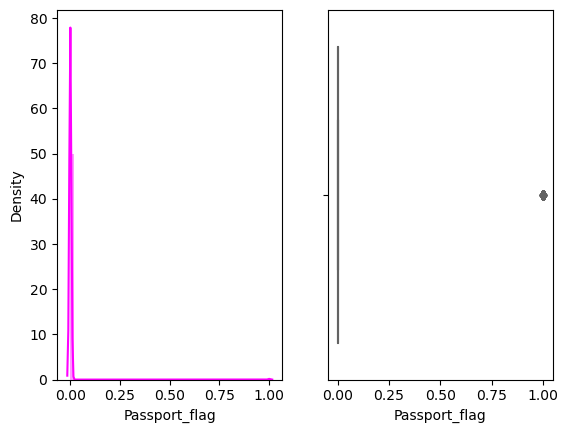

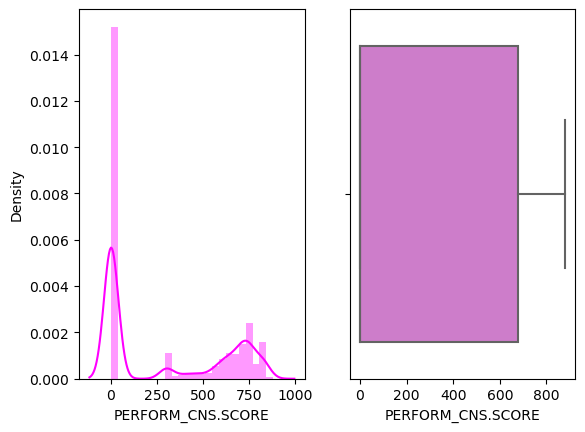

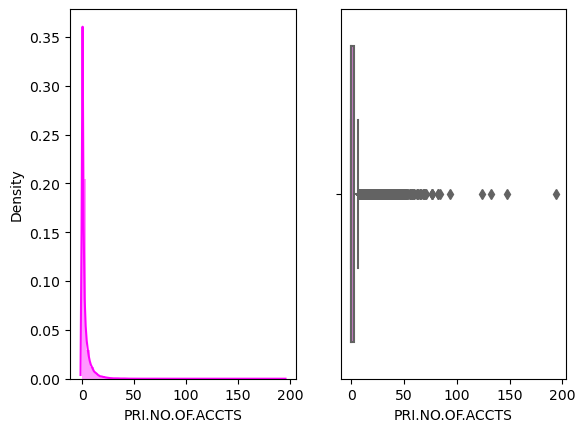

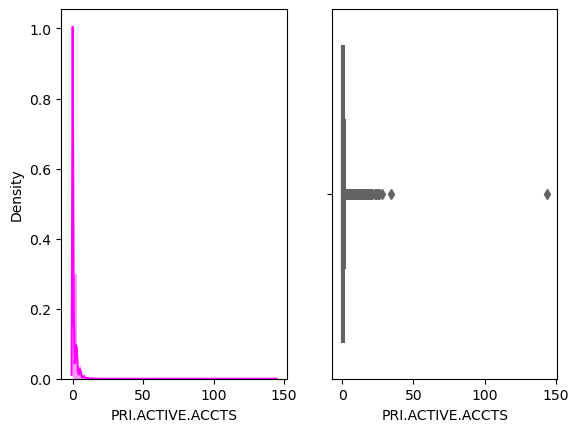

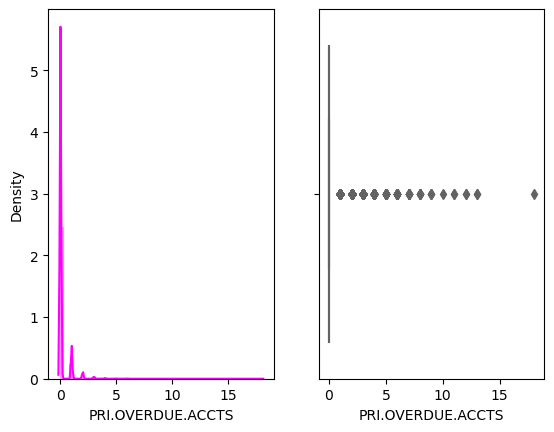

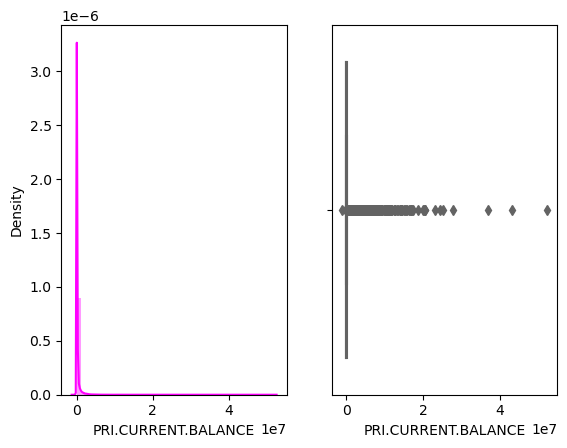

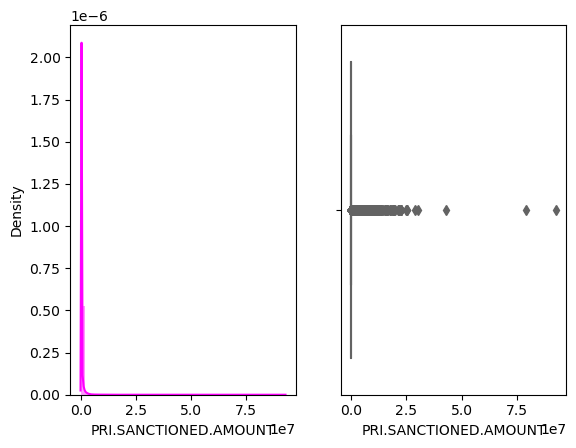

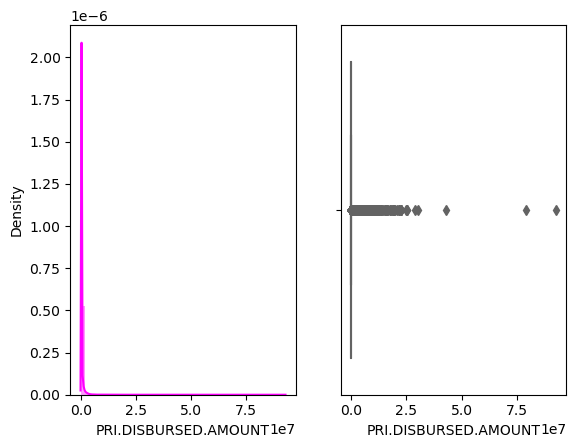

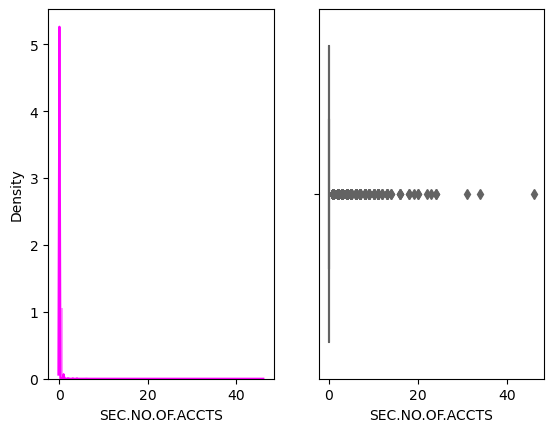

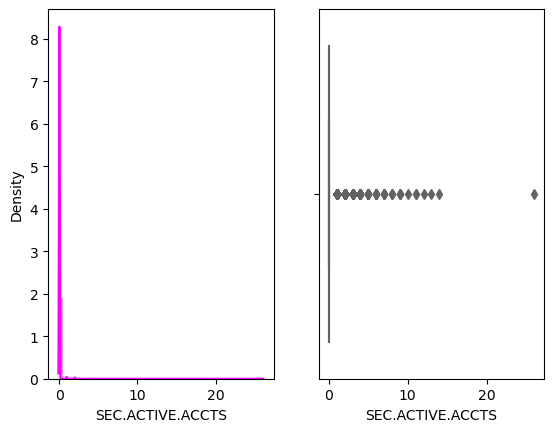

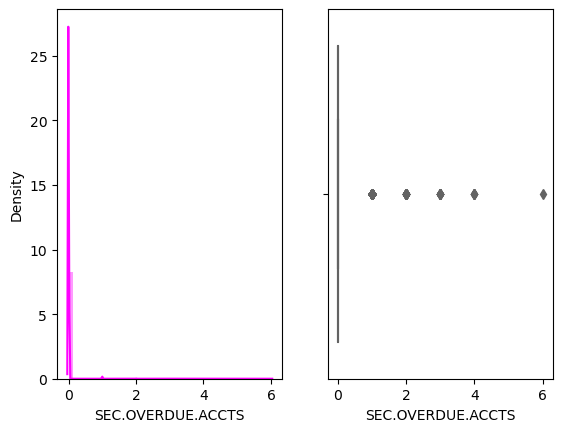

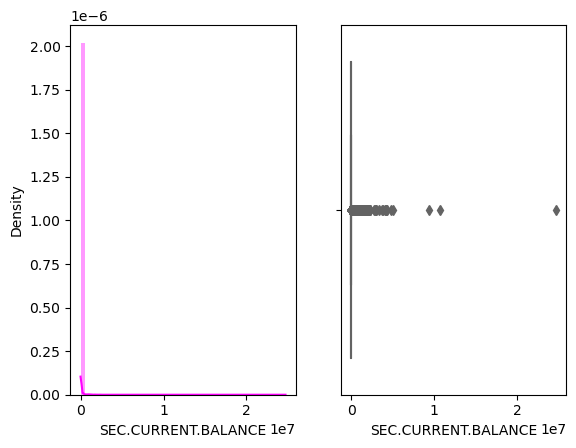

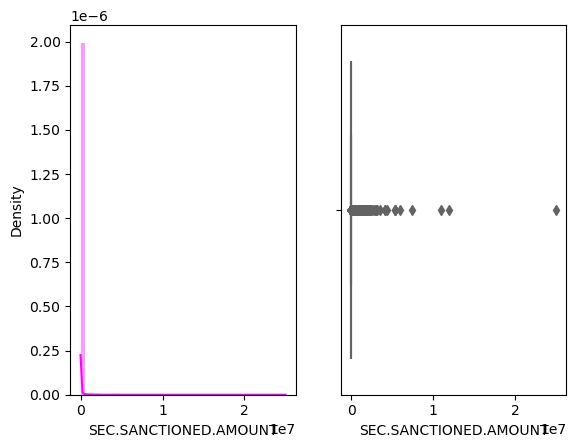

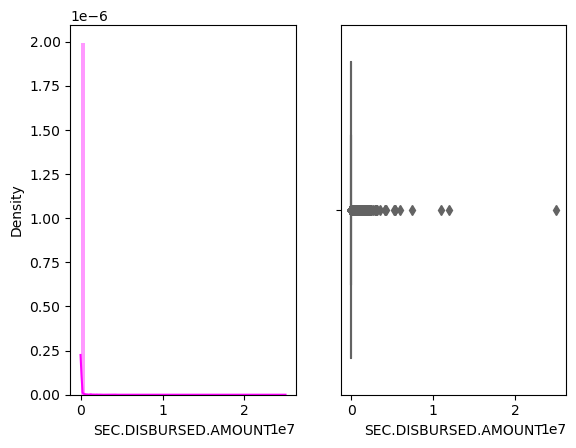

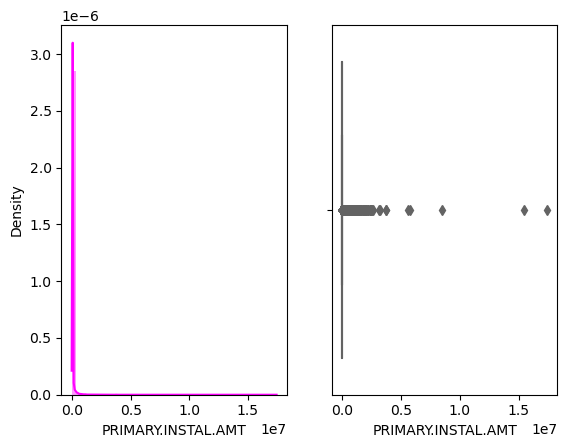

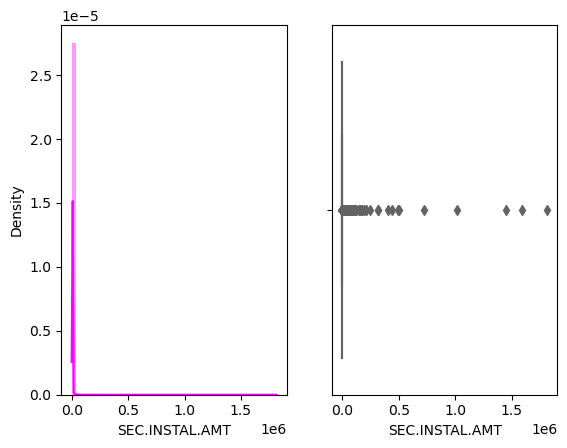

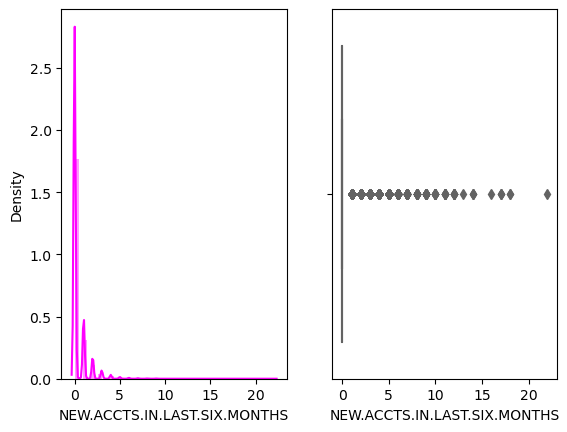

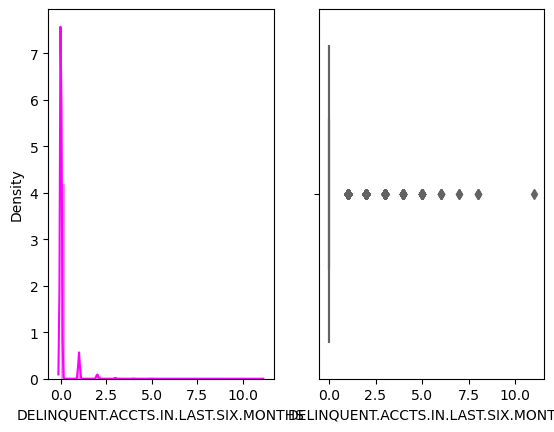

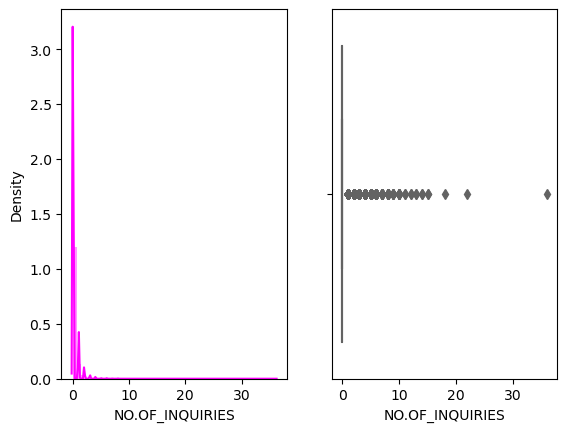

In [20]:
for column in numerical_columns.columns:
    plt.figure()
    
    plt.subplot(121)
    sns.distplot(df[column], color = 'magenta')
    
    plt.subplot(122)
    sns.boxplot(data = df, x = column, color= 'orchid')

<Axes: xlabel='loan_default', ylabel='count'>

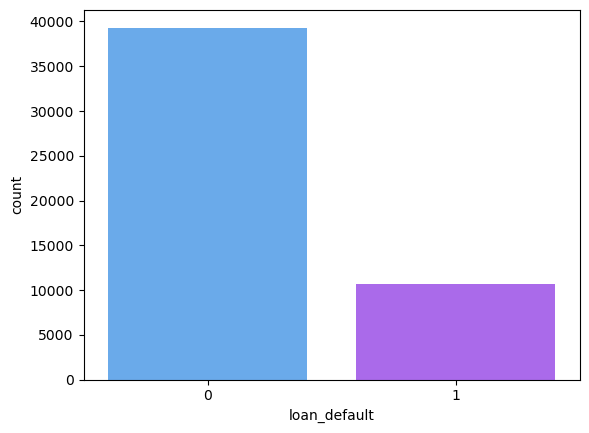

In [21]:
## taget column

sns.countplot(data=df, x = 'loan_default', palette = 'cool')

### Bivariate Analysis

#### Date vs Numerical column

In [22]:
date_columns = [column for column in df.columns if column not in categorical_columns and column not in numerical_columns and column not in nums_to_drop]

In [23]:
date_columns

['Date.of.Birth', 'DisbursalDate']

In [24]:
for column in date_columns:
    df[column] = pd.to_datetime(df[column], format = '%d-%m-%y')

<Figure size 640x480 with 0 Axes>

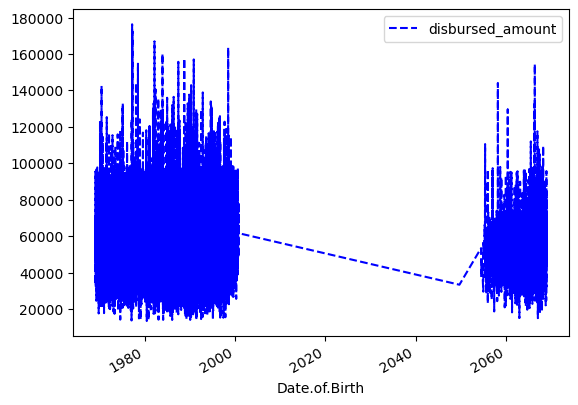

<Figure size 640x480 with 0 Axes>

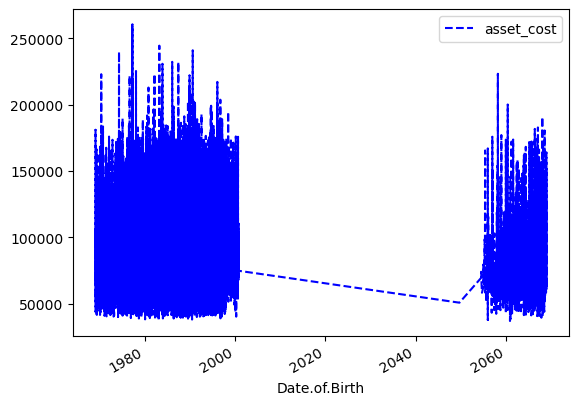

<Figure size 640x480 with 0 Axes>

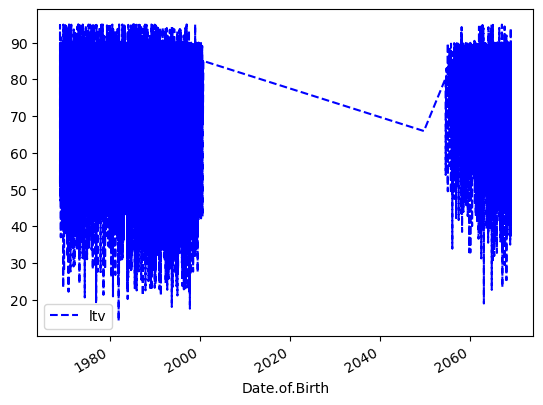

<Figure size 640x480 with 0 Axes>

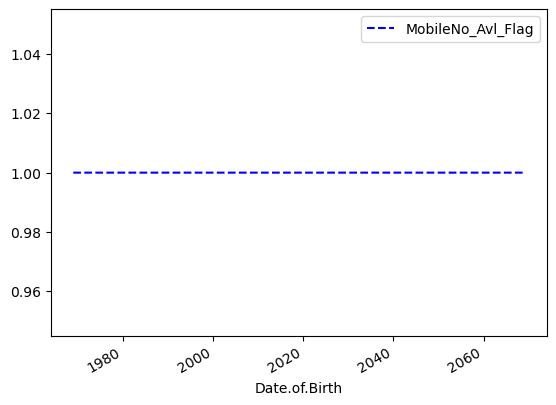

<Figure size 640x480 with 0 Axes>

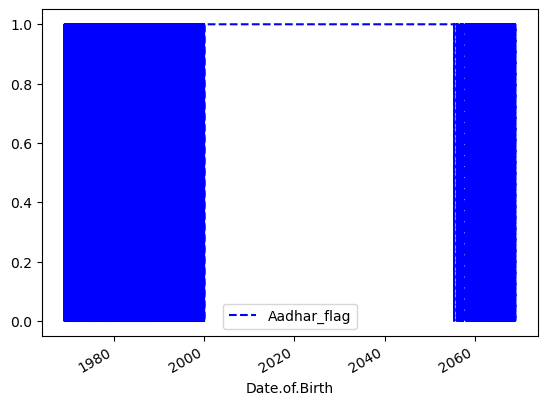

<Figure size 640x480 with 0 Axes>

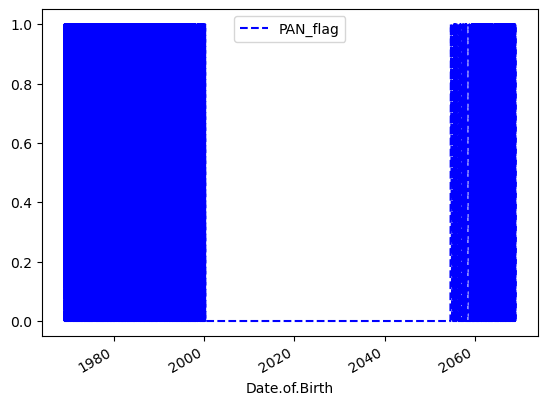

<Figure size 640x480 with 0 Axes>

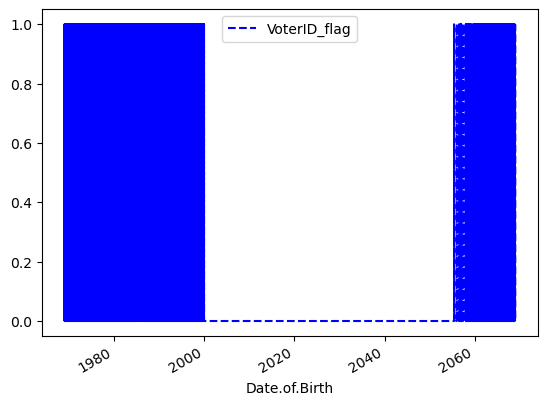

<Figure size 640x480 with 0 Axes>

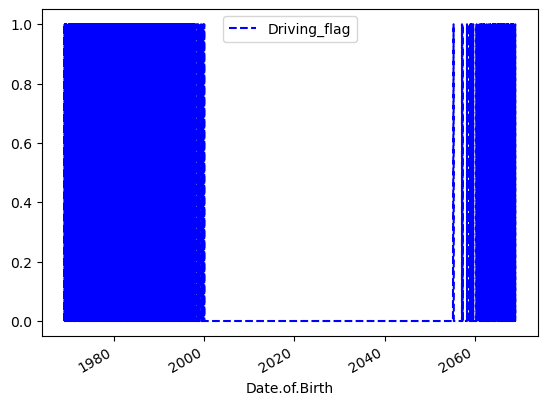

<Figure size 640x480 with 0 Axes>

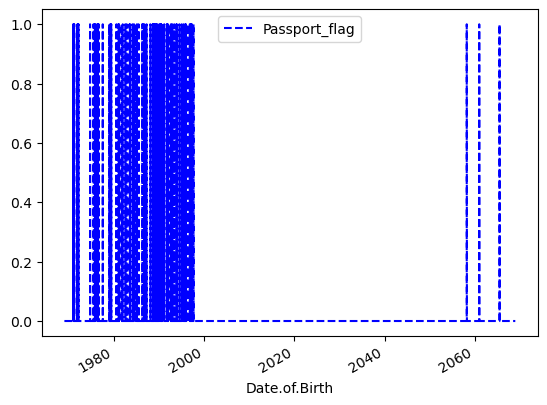

<Figure size 640x480 with 0 Axes>

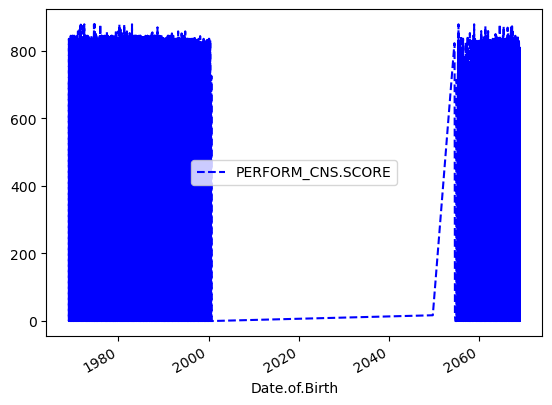

<Figure size 640x480 with 0 Axes>

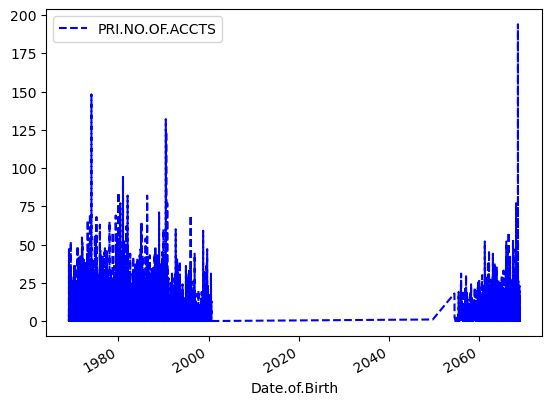

<Figure size 640x480 with 0 Axes>

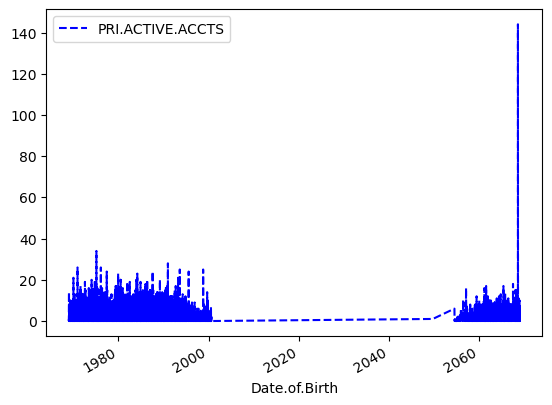

<Figure size 640x480 with 0 Axes>

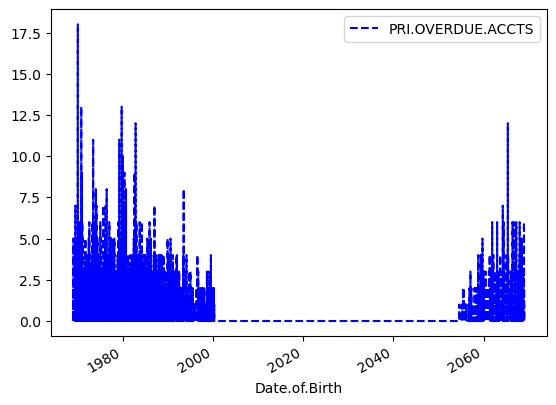

<Figure size 640x480 with 0 Axes>

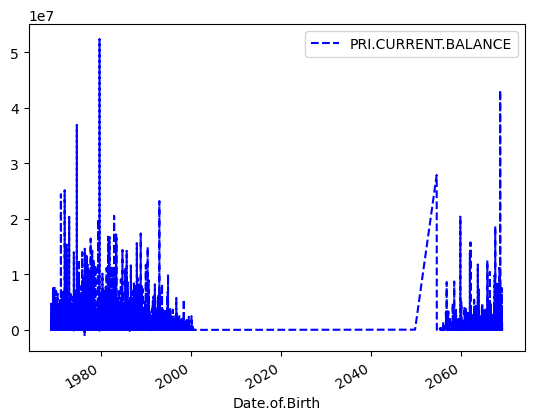

<Figure size 640x480 with 0 Axes>

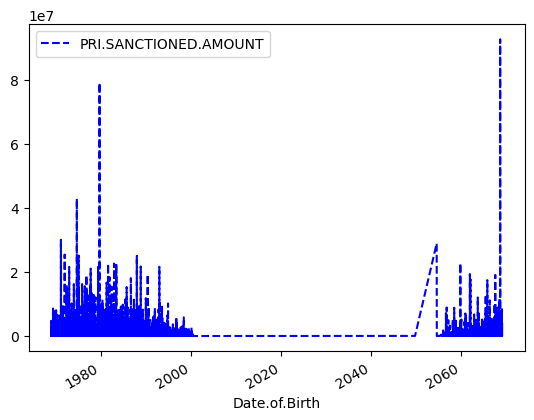

<Figure size 640x480 with 0 Axes>

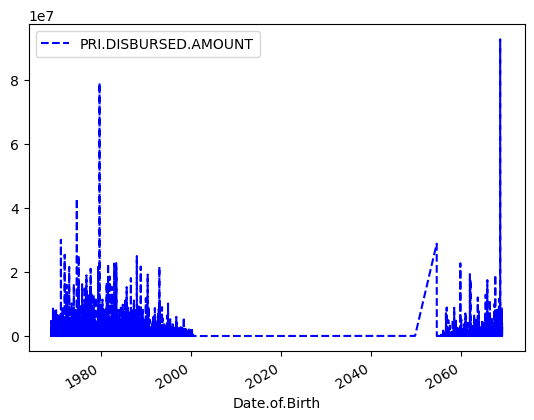

<Figure size 640x480 with 0 Axes>

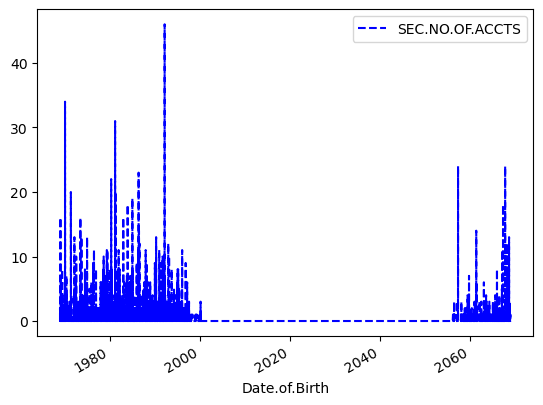

<Figure size 640x480 with 0 Axes>

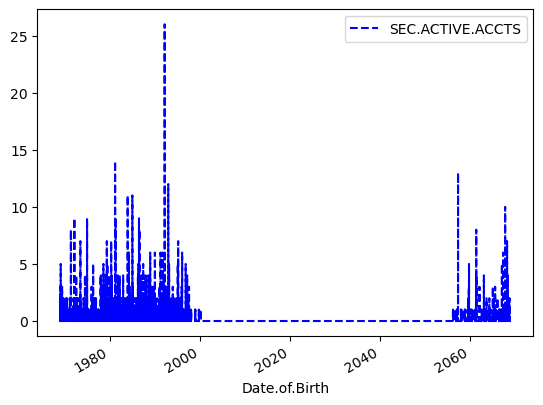

<Figure size 640x480 with 0 Axes>

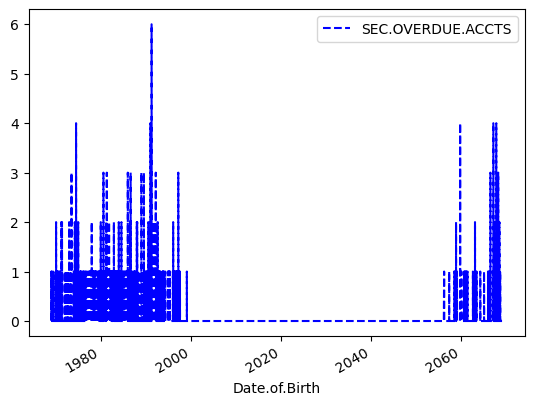

<Figure size 640x480 with 0 Axes>

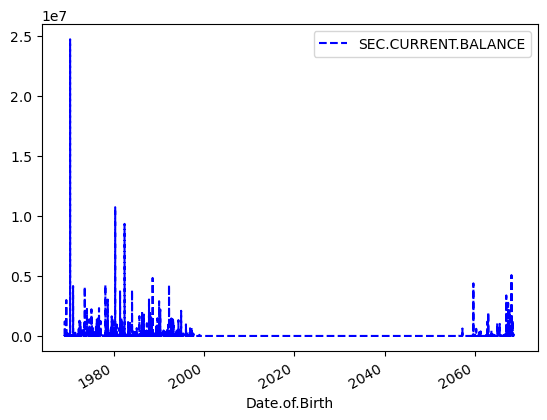

<Figure size 640x480 with 0 Axes>

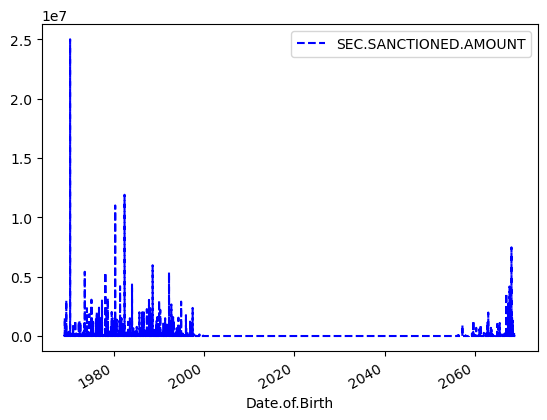

<Figure size 640x480 with 0 Axes>

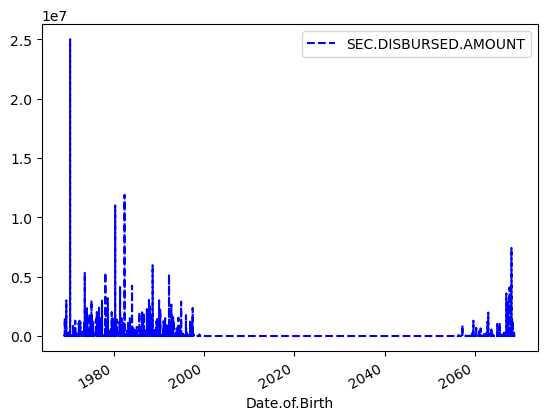

<Figure size 640x480 with 0 Axes>

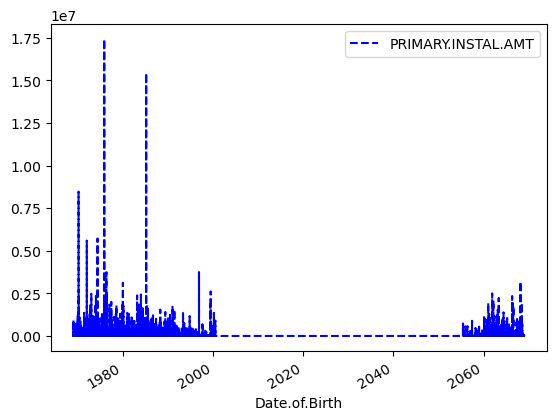

<Figure size 640x480 with 0 Axes>

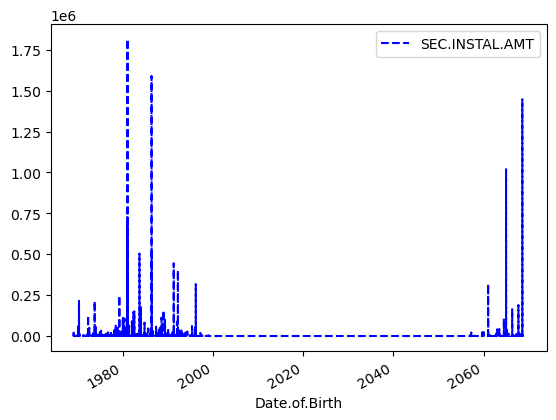

<Figure size 640x480 with 0 Axes>

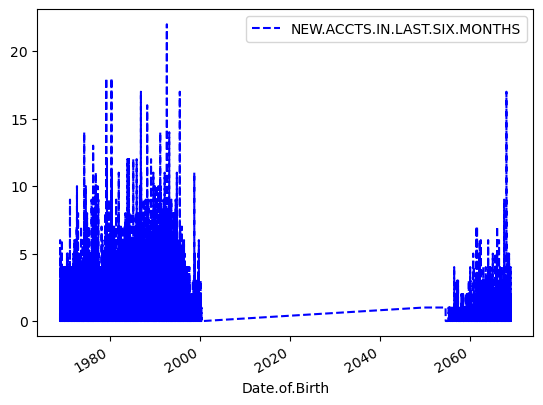

<Figure size 640x480 with 0 Axes>

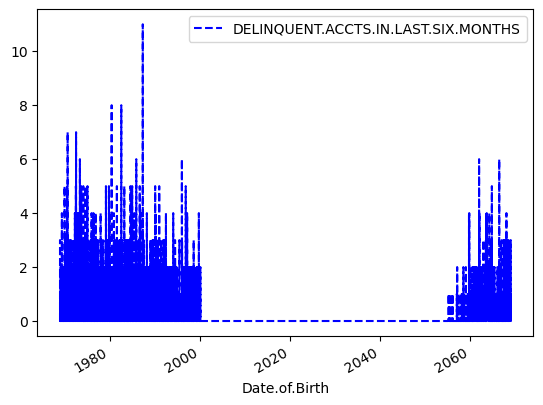

<Figure size 640x480 with 0 Axes>

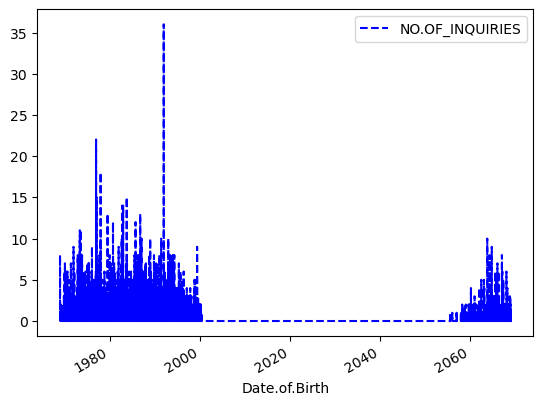

<Figure size 640x480 with 0 Axes>

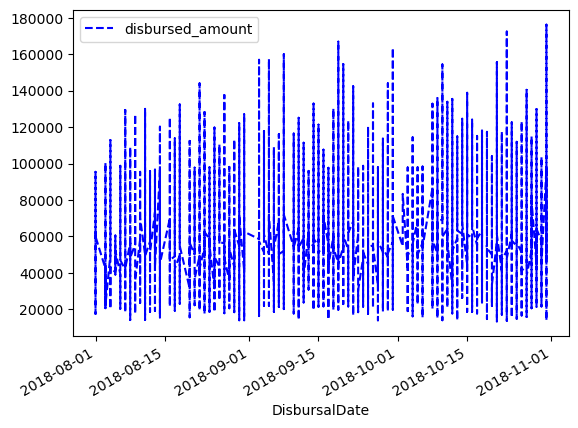

<Figure size 640x480 with 0 Axes>

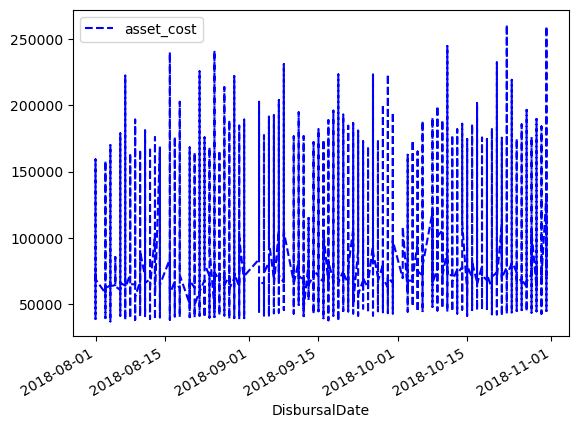

<Figure size 640x480 with 0 Axes>

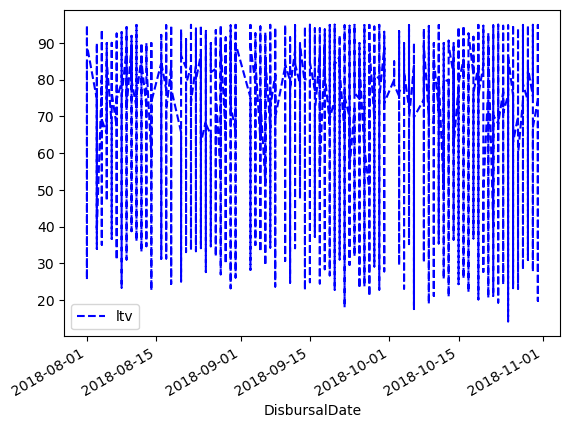

<Figure size 640x480 with 0 Axes>

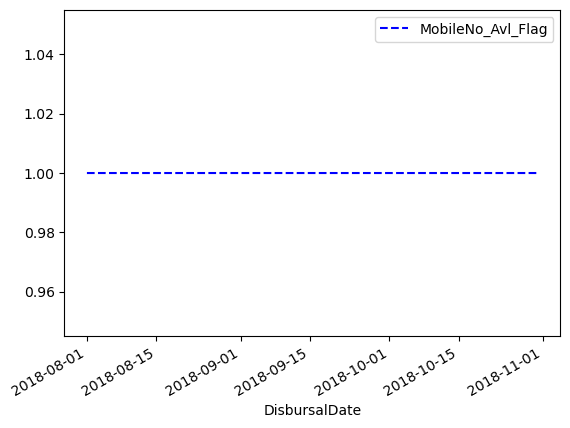

<Figure size 640x480 with 0 Axes>

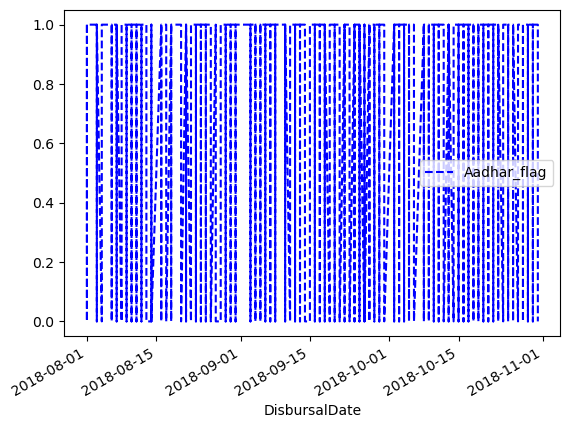

<Figure size 640x480 with 0 Axes>

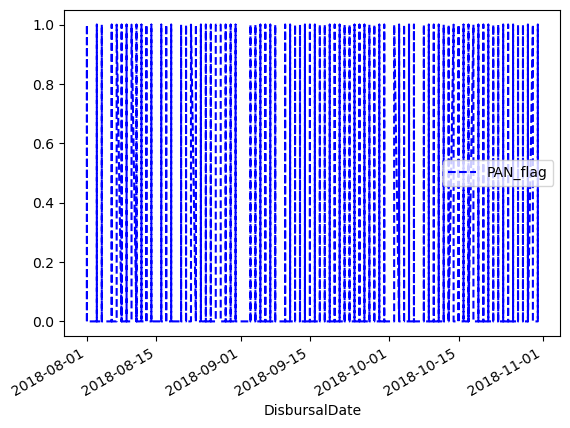

<Figure size 640x480 with 0 Axes>

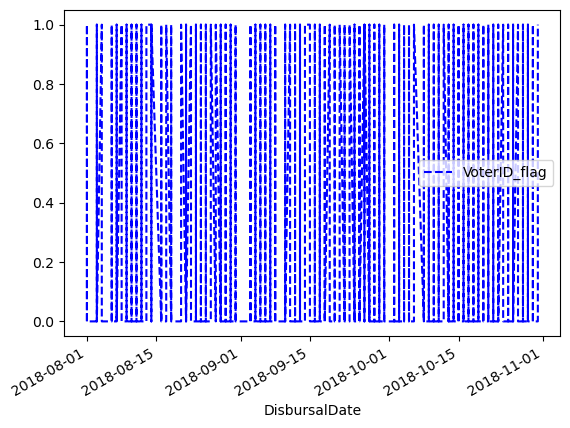

<Figure size 640x480 with 0 Axes>

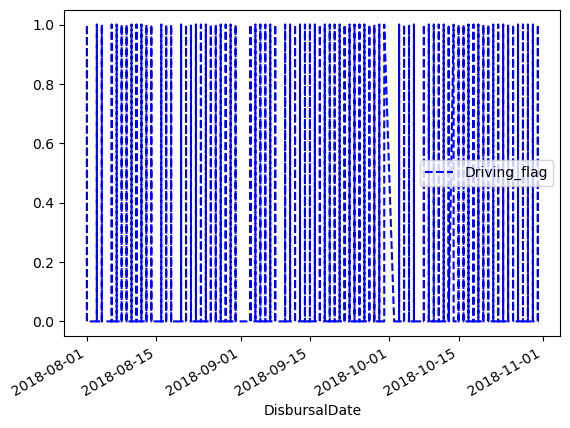

<Figure size 640x480 with 0 Axes>

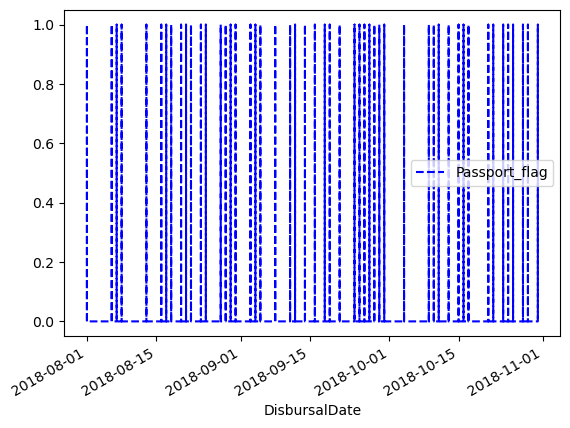

<Figure size 640x480 with 0 Axes>

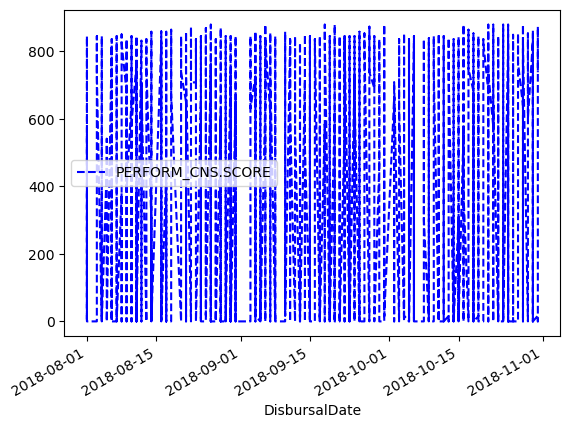

<Figure size 640x480 with 0 Axes>

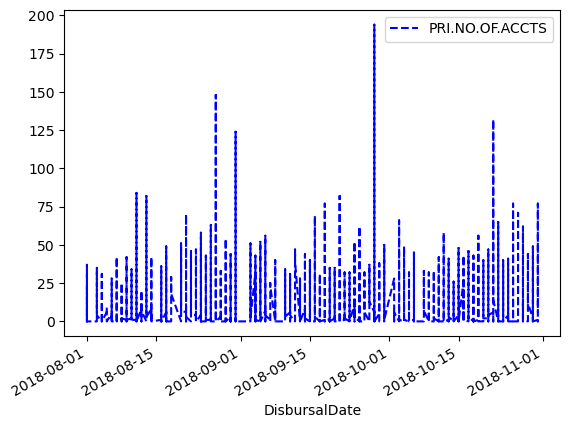

<Figure size 640x480 with 0 Axes>

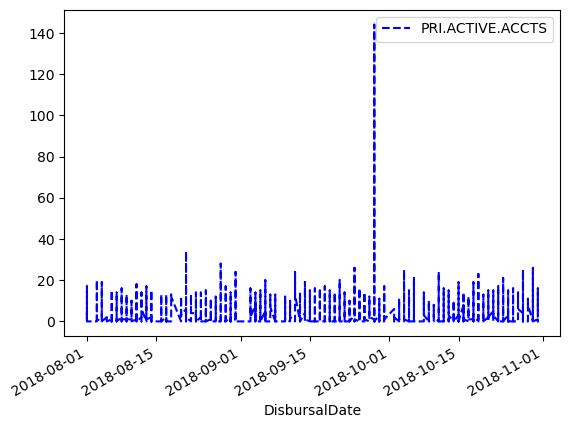

<Figure size 640x480 with 0 Axes>

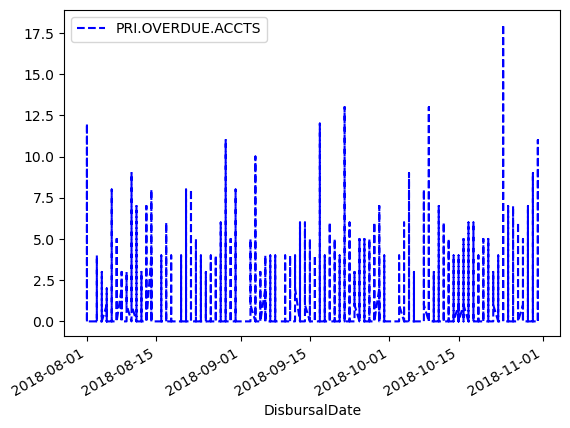

<Figure size 640x480 with 0 Axes>

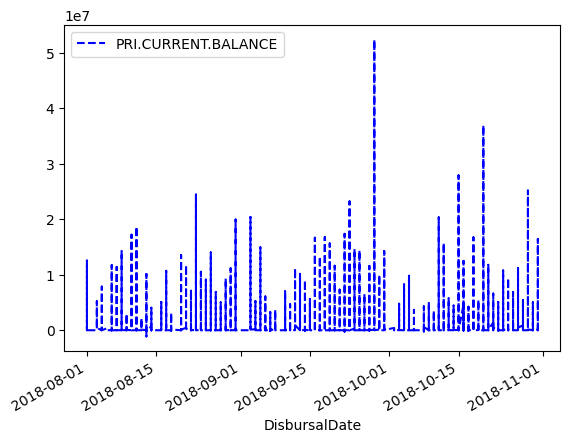

<Figure size 640x480 with 0 Axes>

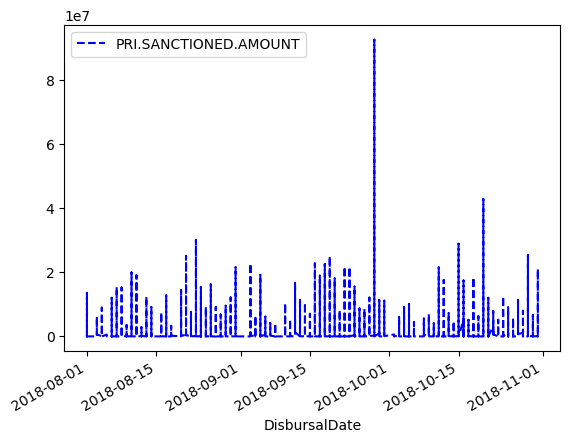

<Figure size 640x480 with 0 Axes>

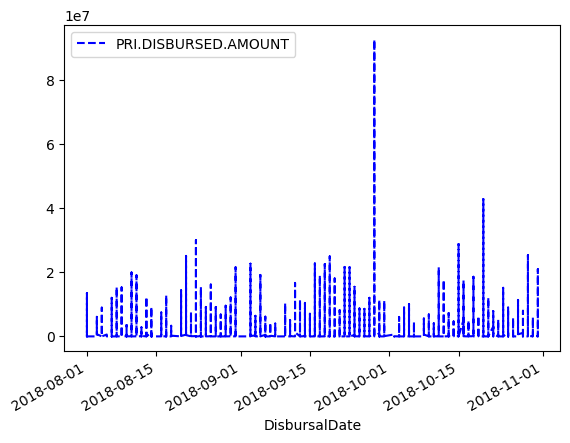

<Figure size 640x480 with 0 Axes>

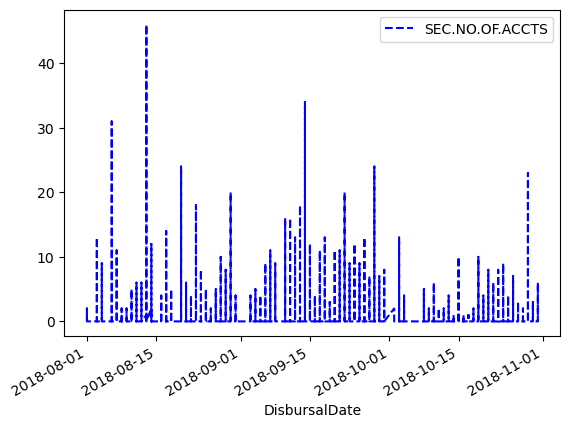

<Figure size 640x480 with 0 Axes>

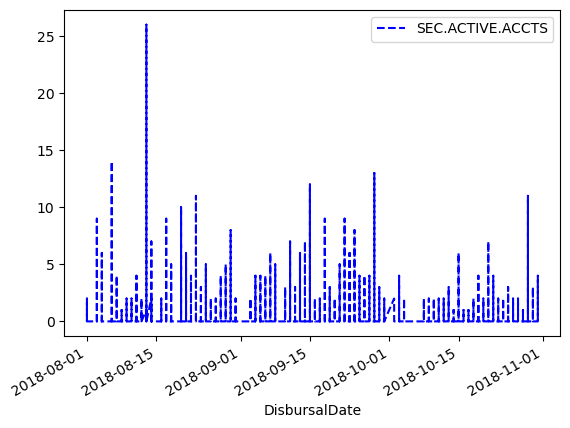

<Figure size 640x480 with 0 Axes>

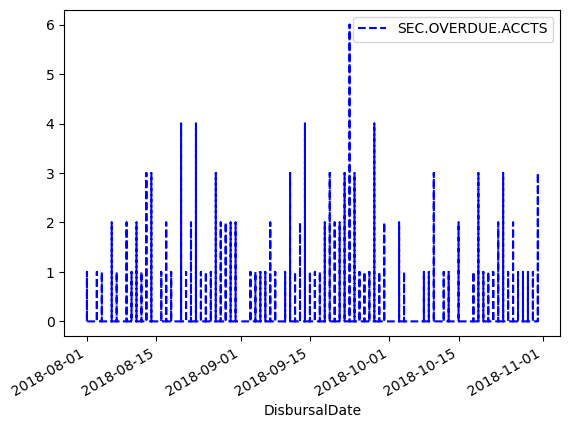

<Figure size 640x480 with 0 Axes>

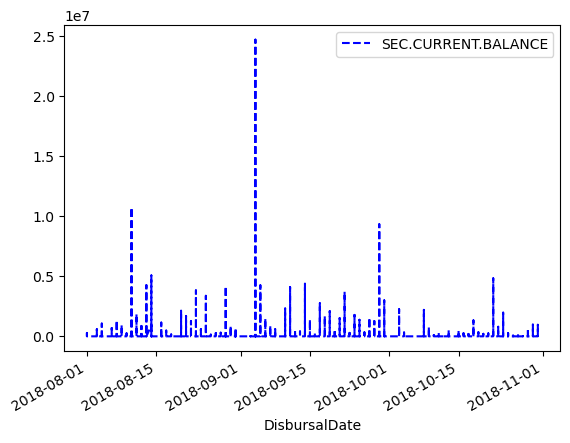

<Figure size 640x480 with 0 Axes>

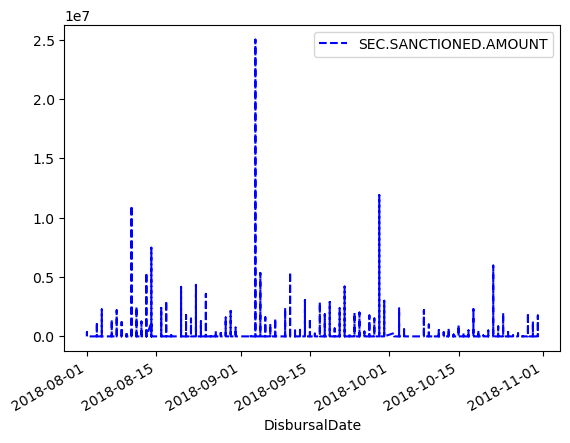

<Figure size 640x480 with 0 Axes>

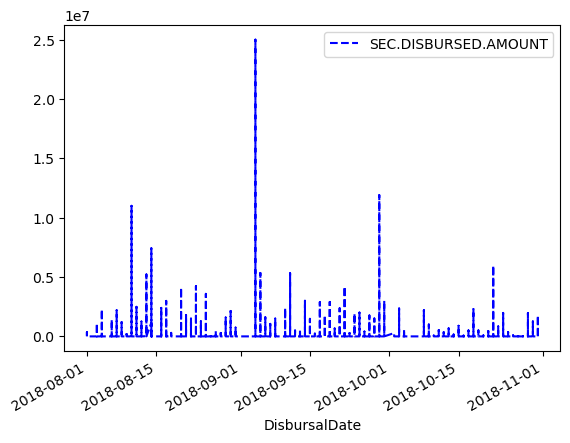

<Figure size 640x480 with 0 Axes>

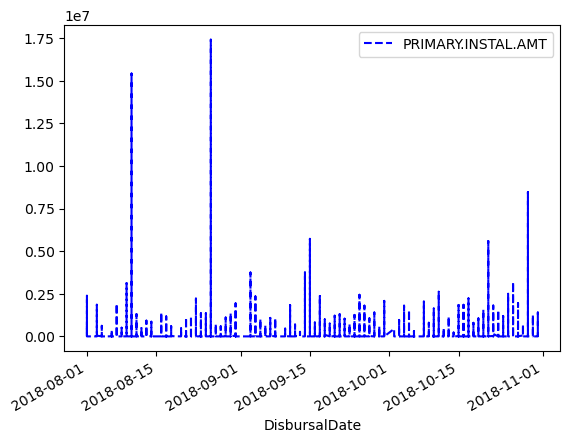

<Figure size 640x480 with 0 Axes>

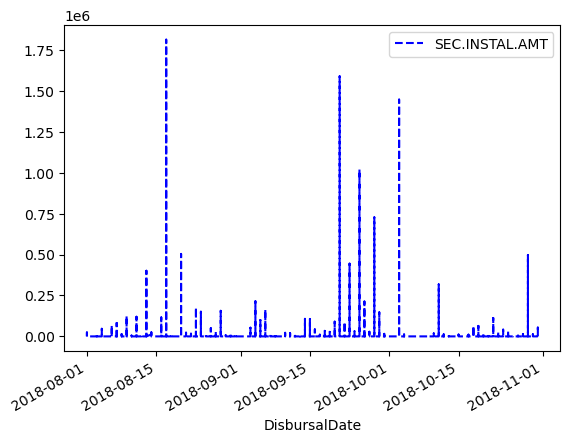

<Figure size 640x480 with 0 Axes>

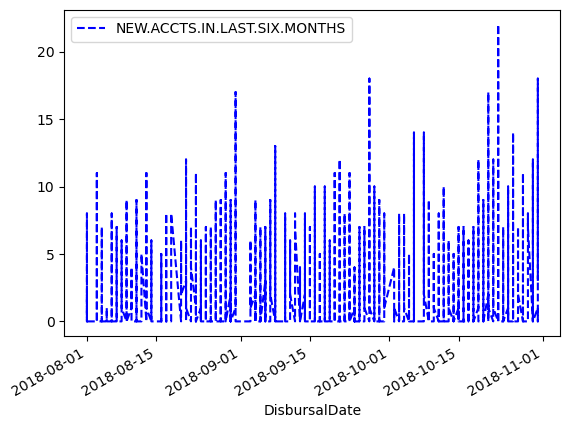

<Figure size 640x480 with 0 Axes>

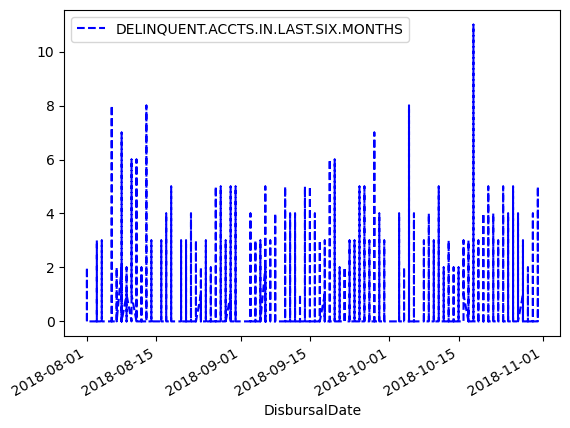

<Figure size 640x480 with 0 Axes>

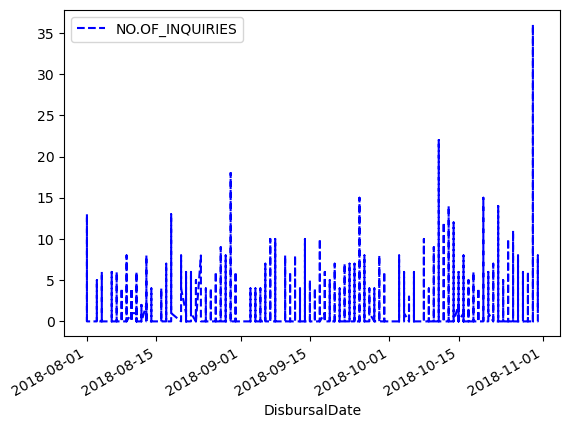

In [25]:
for date_col in date_columns:
    for num_column in numerical_columns:
        plt.figure()
        
        df.plot(x = date_col, y = num_column, color='blue', linestyle = 'dashed', kind = 'line', )

#### Numerical vs Categorical(Target)

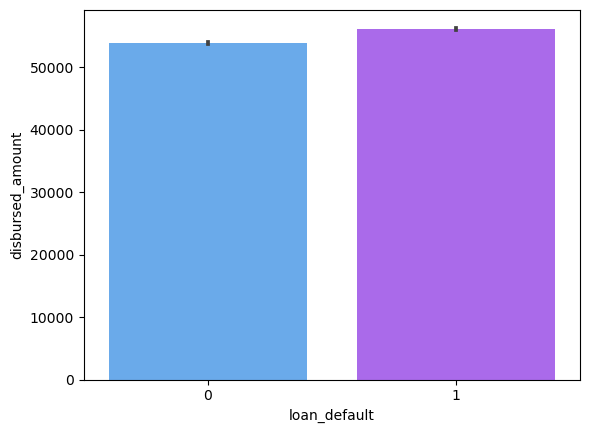

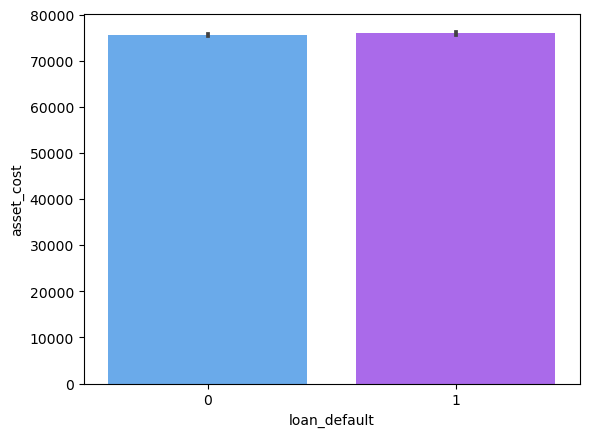

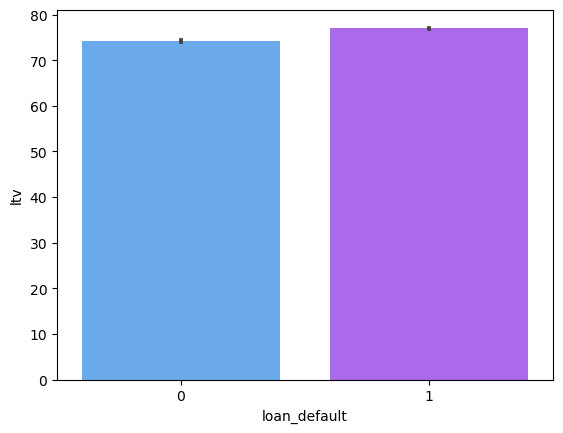

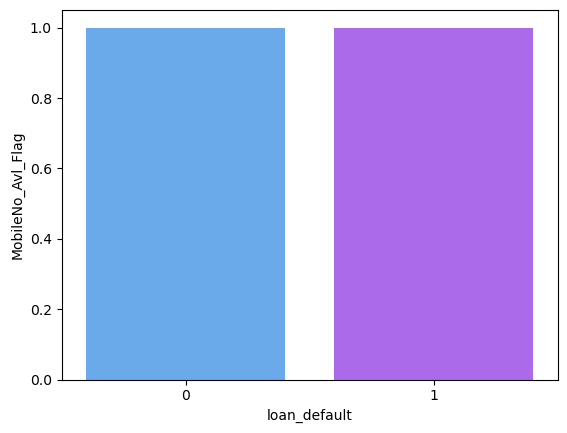

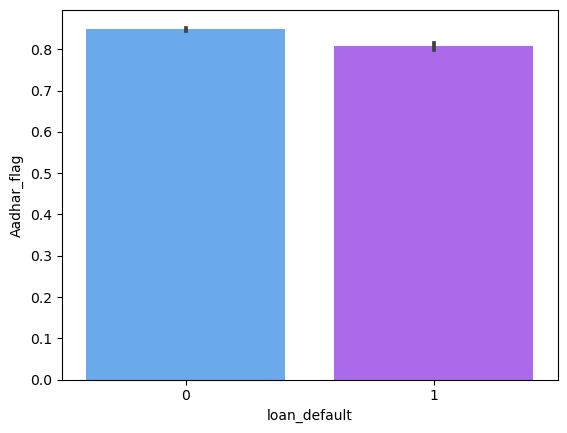

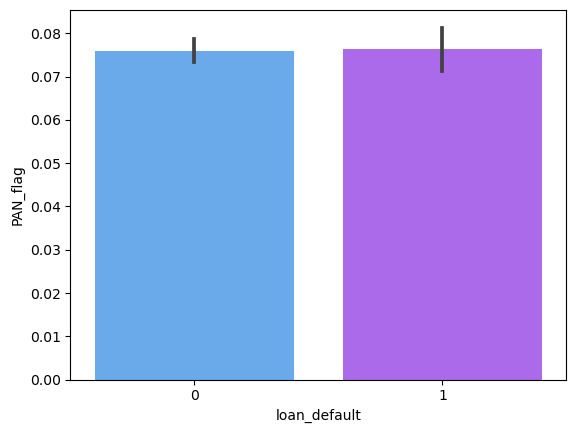

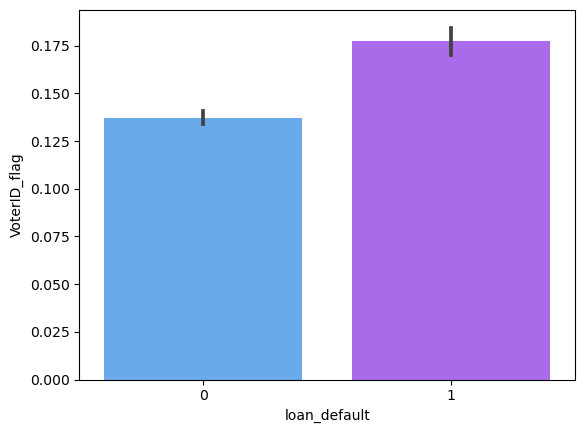

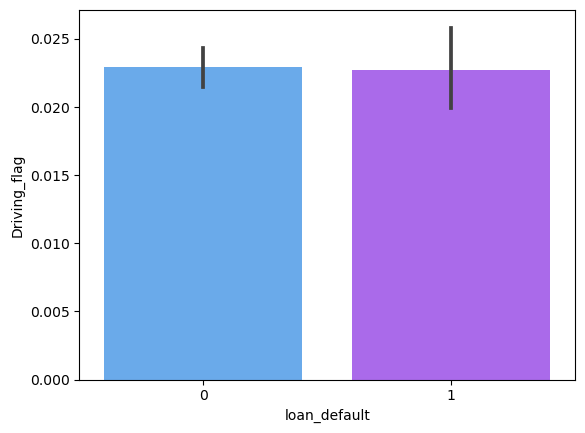

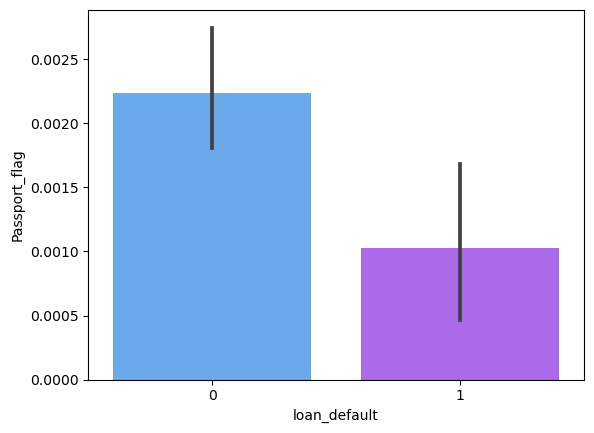

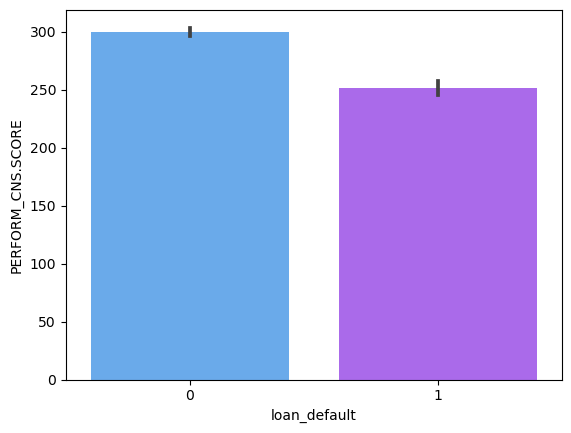

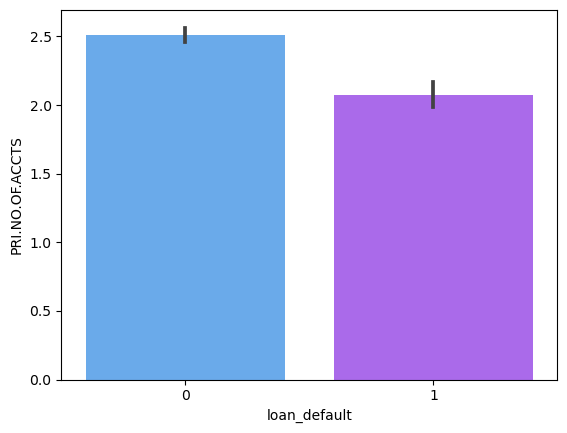

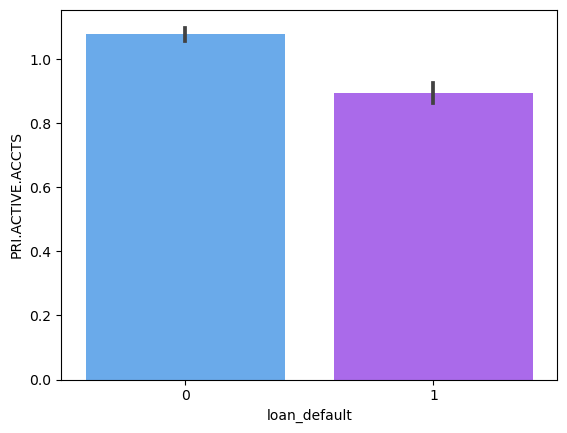

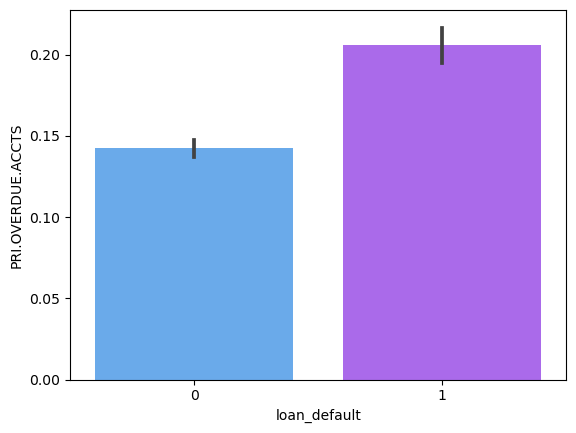

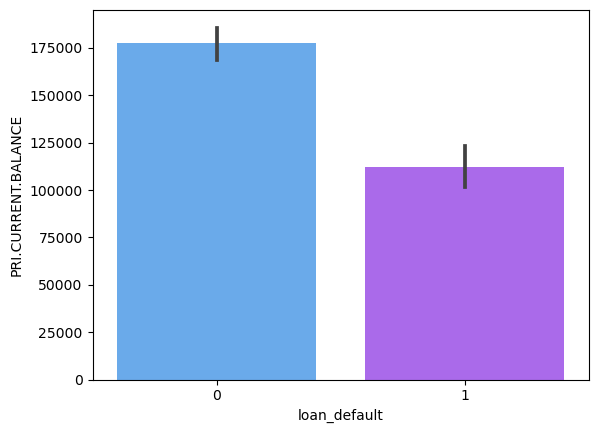

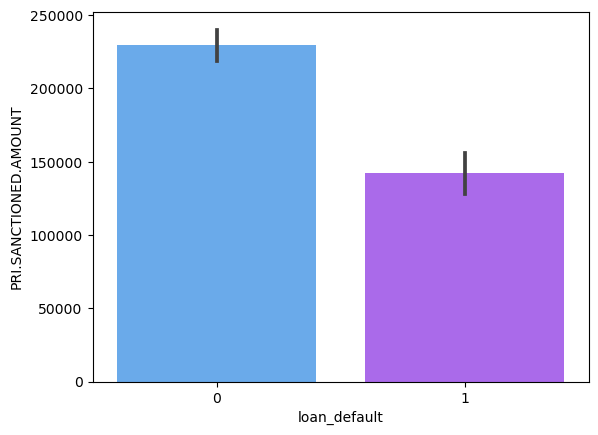

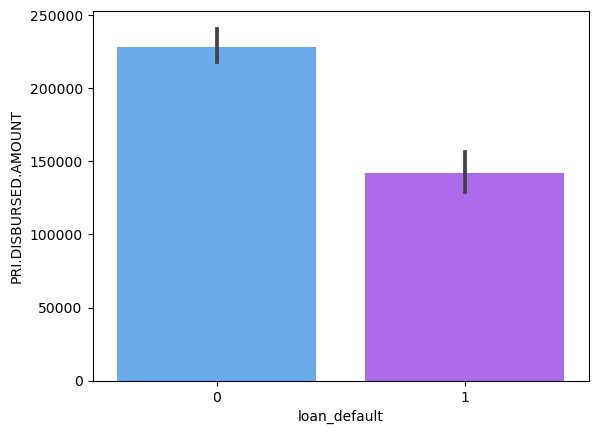

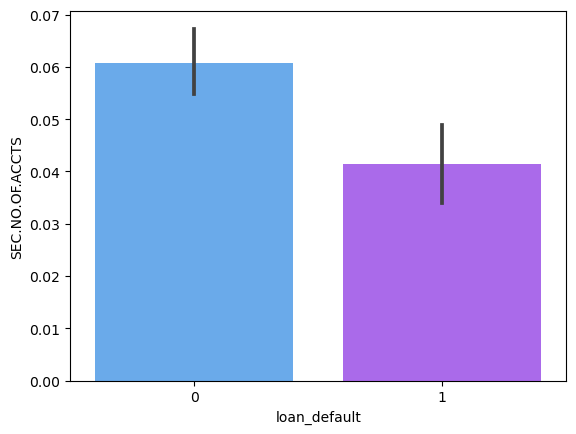

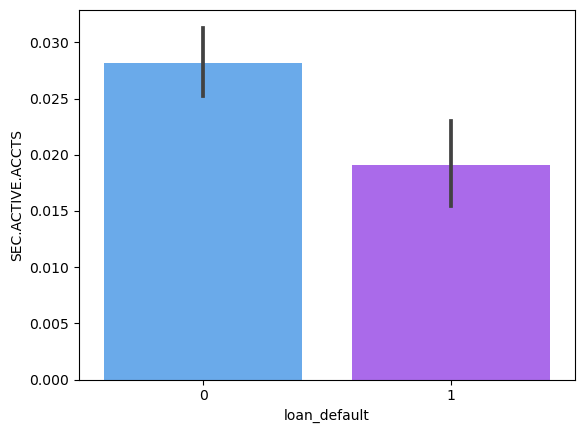

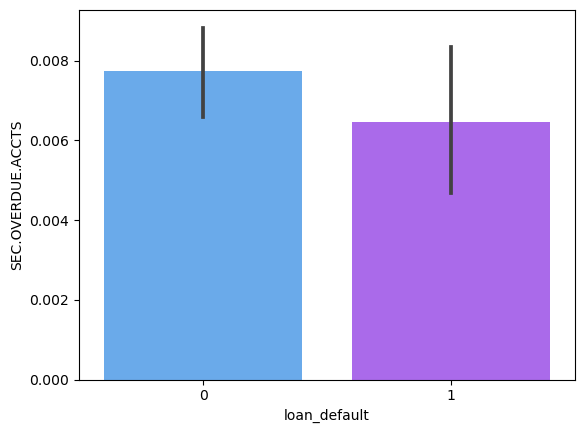

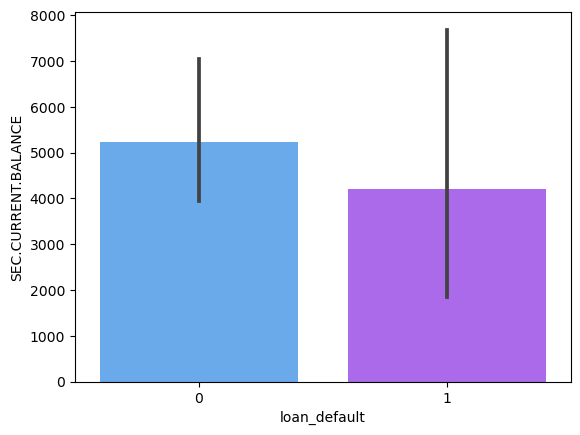

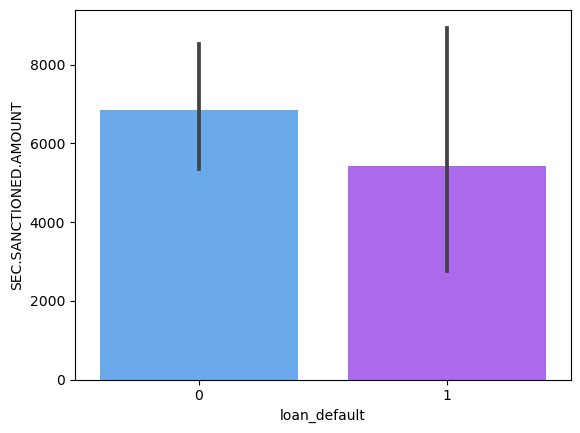

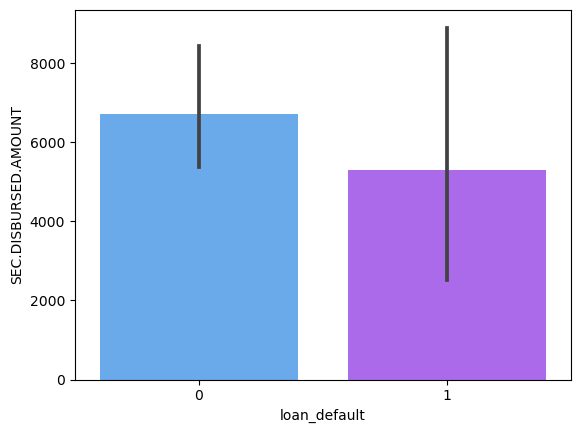

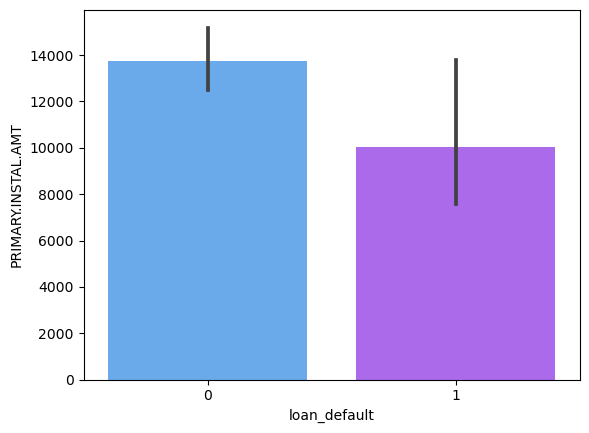

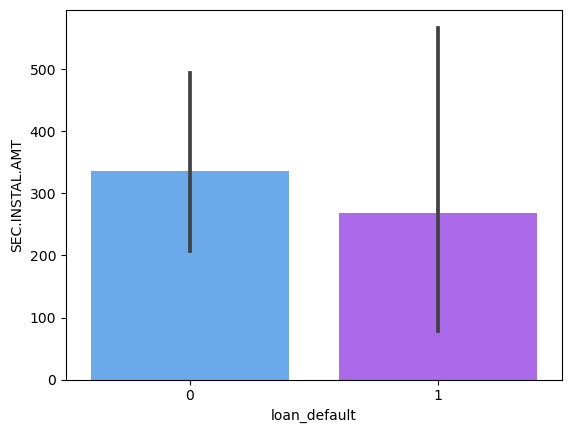

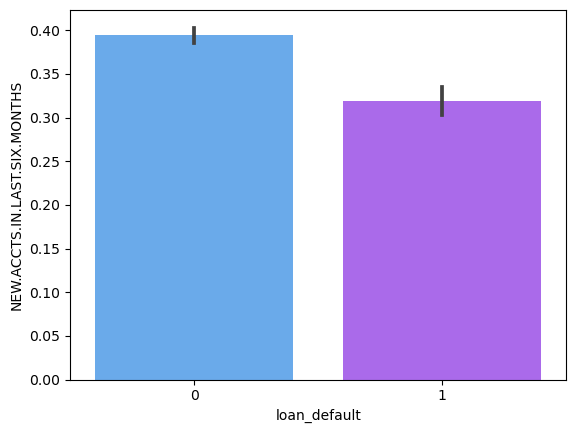

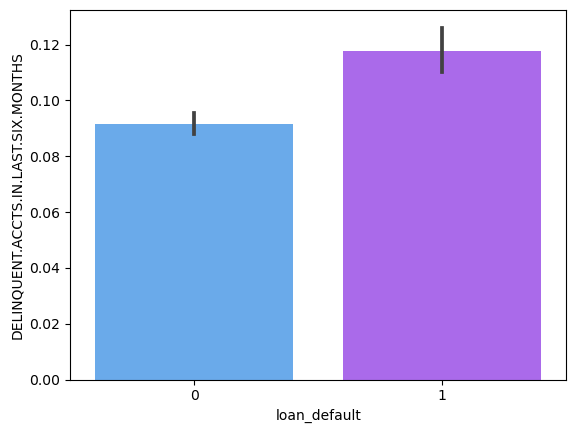

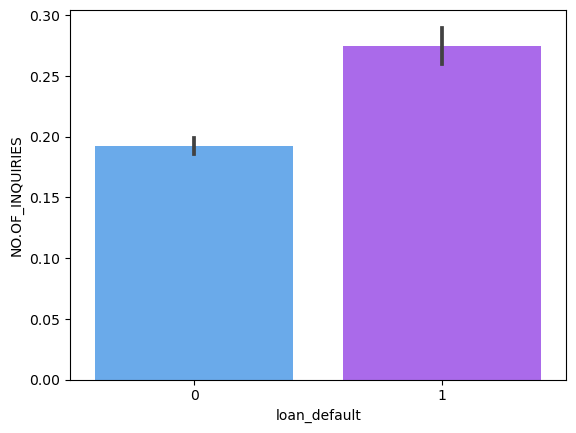

In [26]:
for column in numerical_columns:
    plt.figure()
    
    sns.barplot(data=df, x = 'loan_default', y = column, palette = 'cool')

In [27]:
for column in numerical_columns:
    print()
    print(df.pivot_table(index = 'loan_default', values = [column], aggfunc = ['mean', 'median'], margins = True))
    print()


                         mean           median
             disbursed_amount disbursed_amount
loan_default                                  
0                53837.782093            53303
1                56086.632756            55413
All              54318.361480            53759


                      mean     median
                asset_cost asset_cost
loan_default                         
0             75678.173140      70777
1             76004.770987      71260
All           75747.967100      70882


                   mean median
                    ltv    ltv
loan_default                  
0             74.206617  76.12
1             76.968052  79.17
All           74.796735  76.92


                          mean            median
             MobileNo_Avl_Flag MobileNo_Avl_Flag
loan_default                                    
0                            1                 1
1                            1                 1
All                          1                 1


 

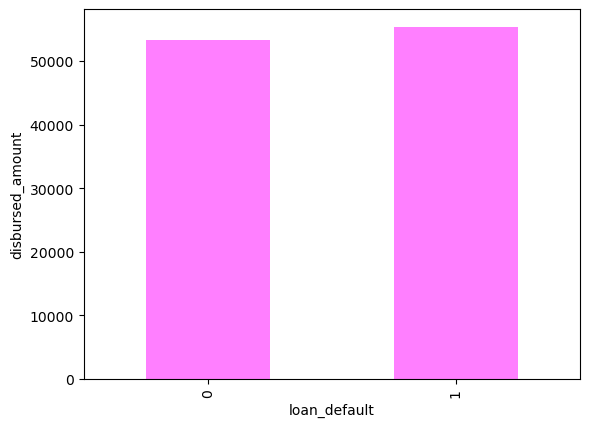

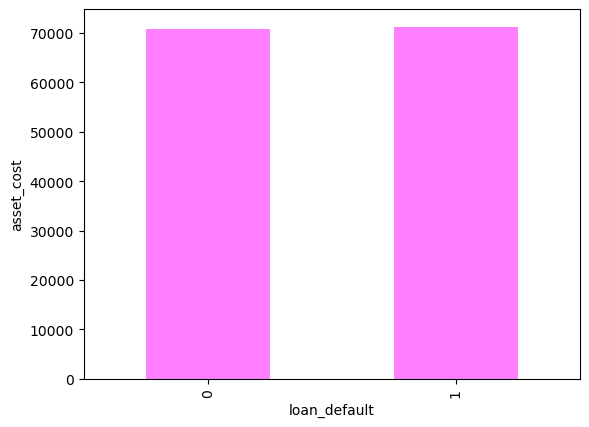

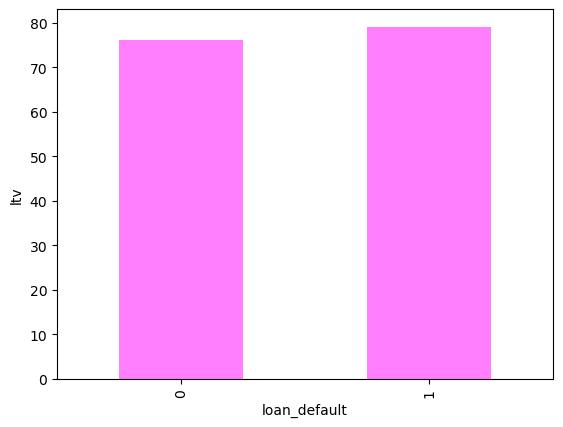

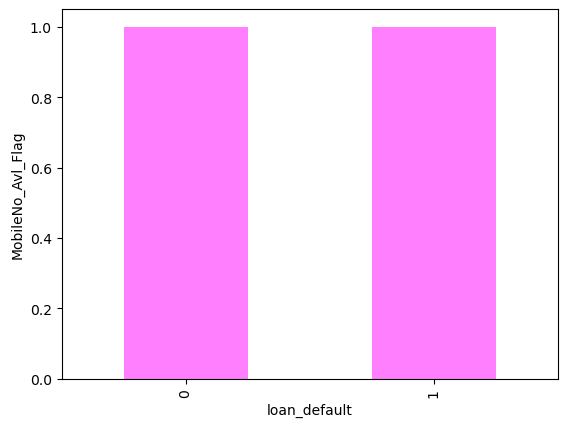

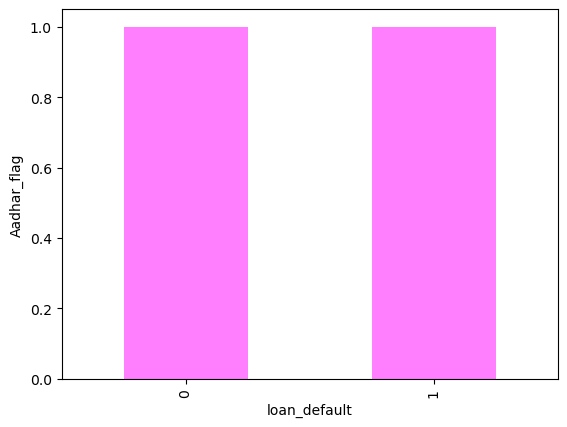

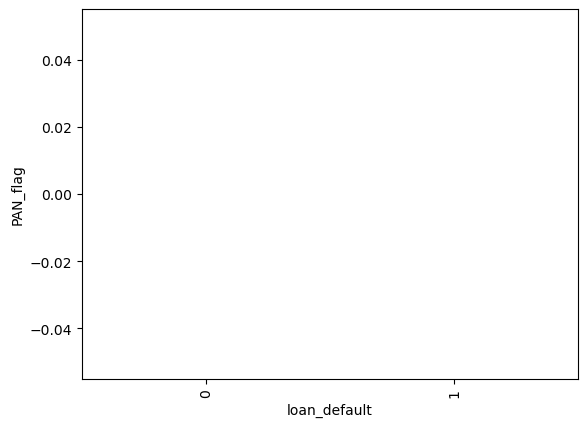

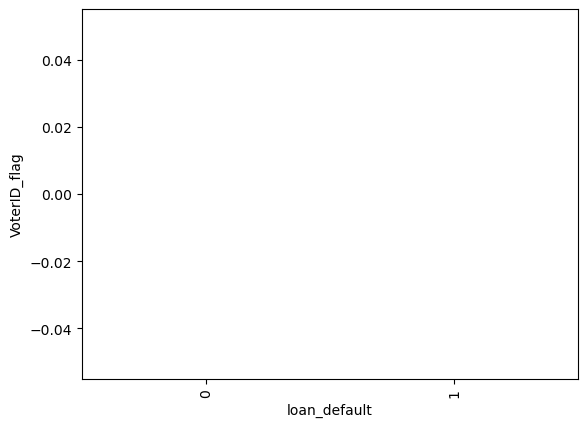

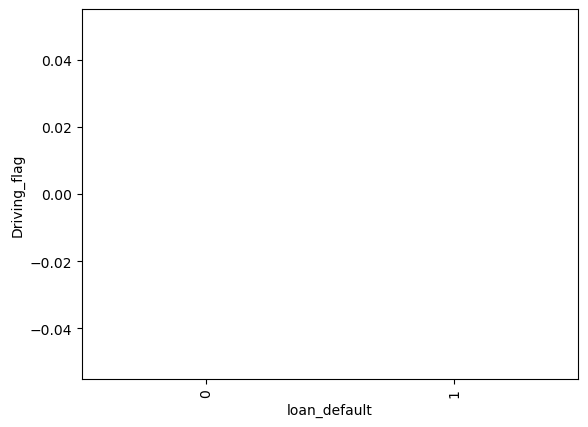

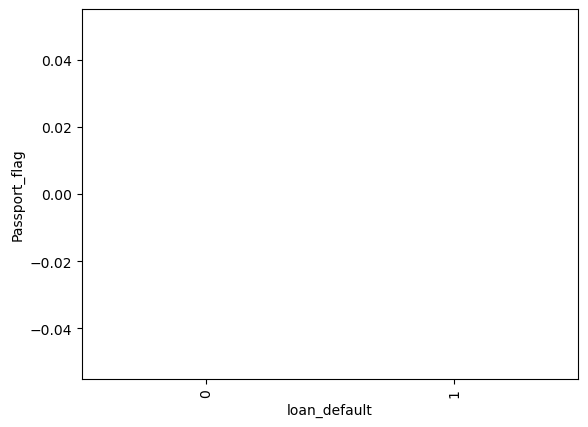

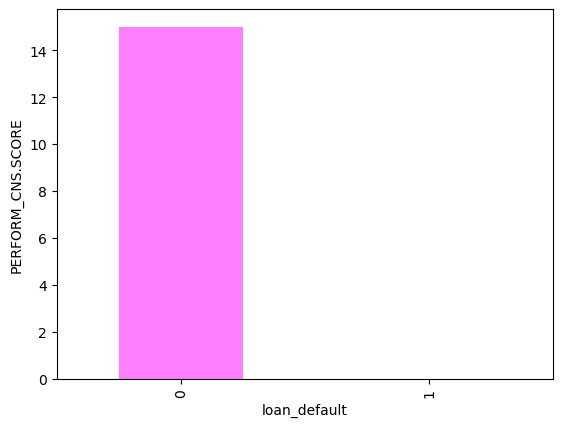

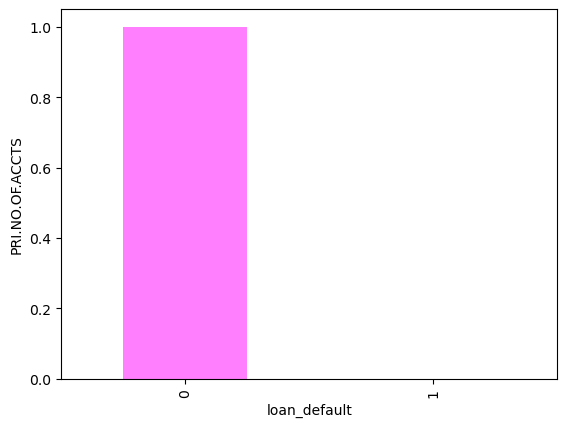

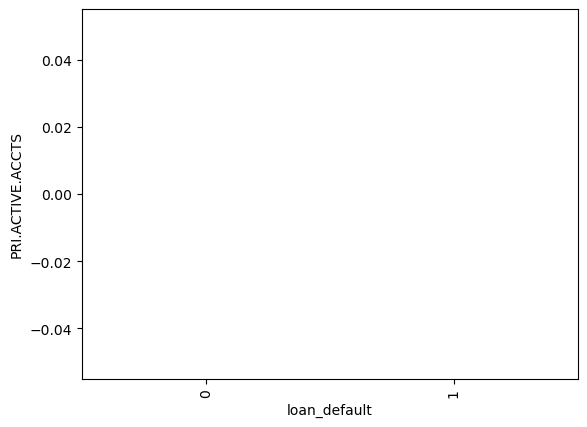

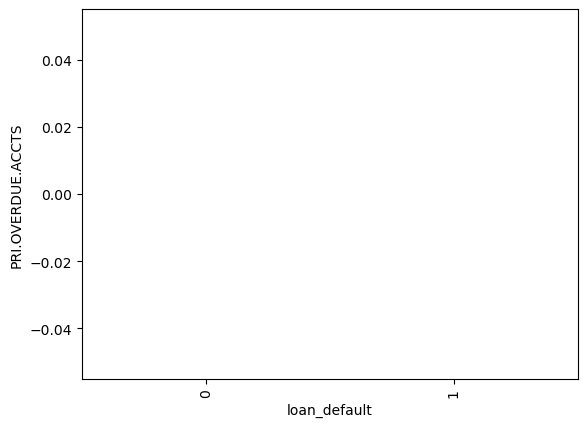

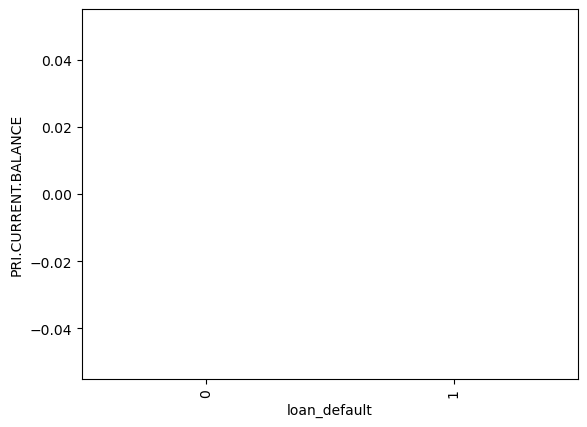

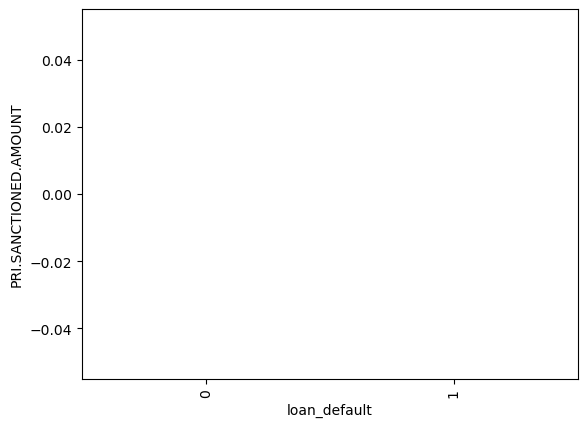

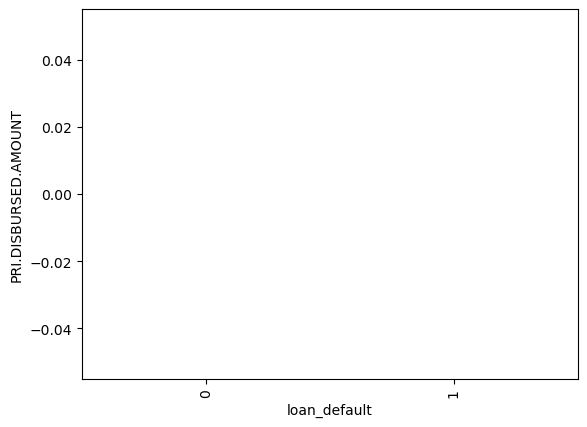

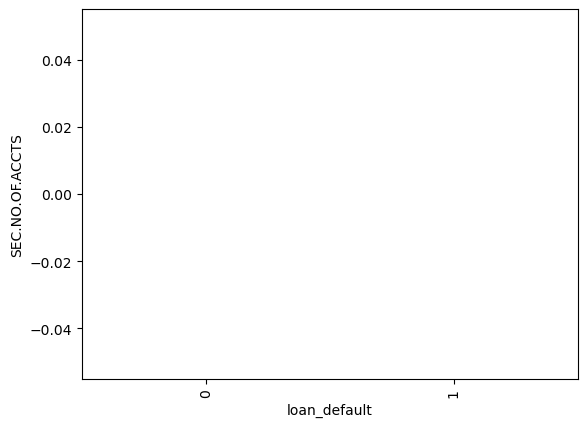

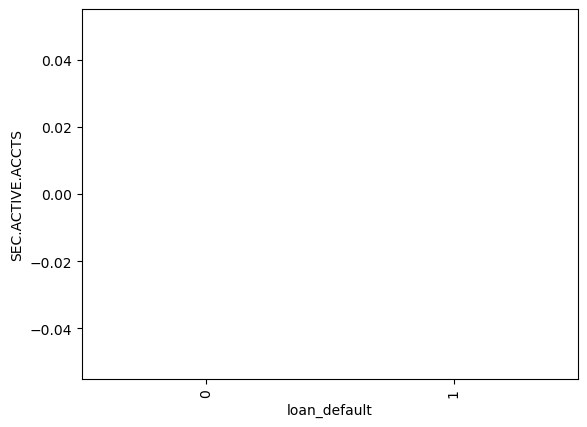

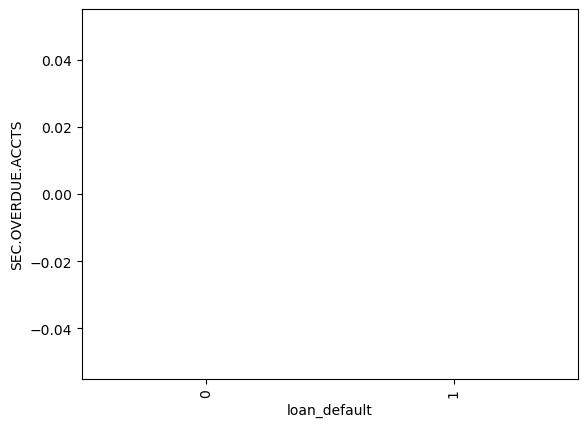

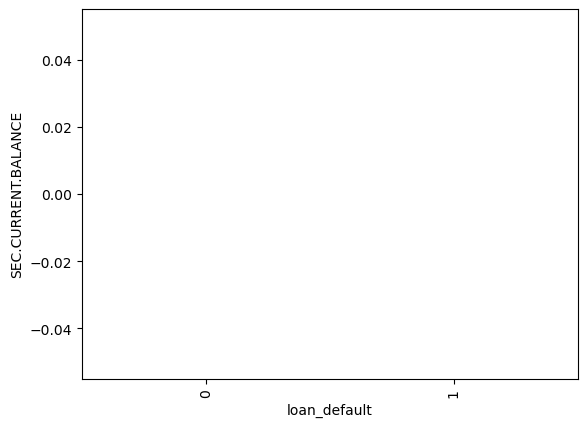

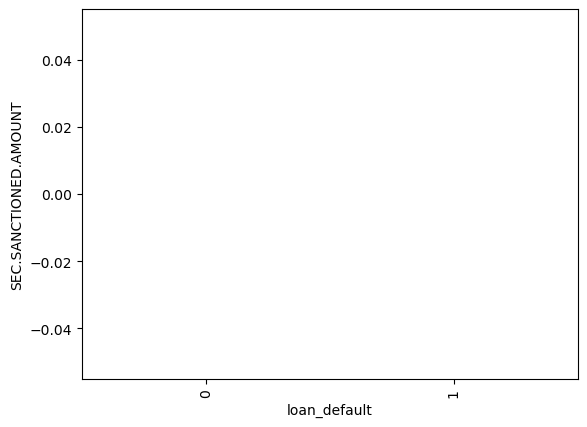

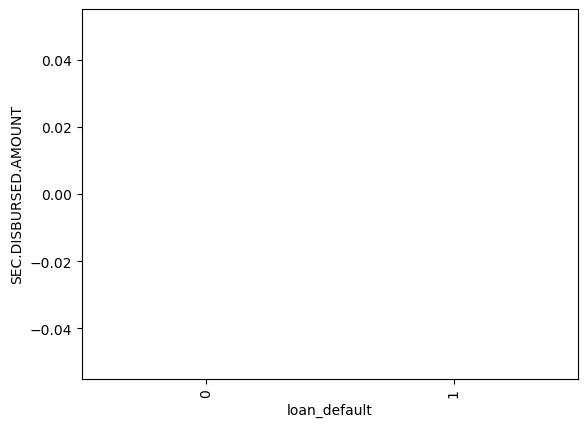

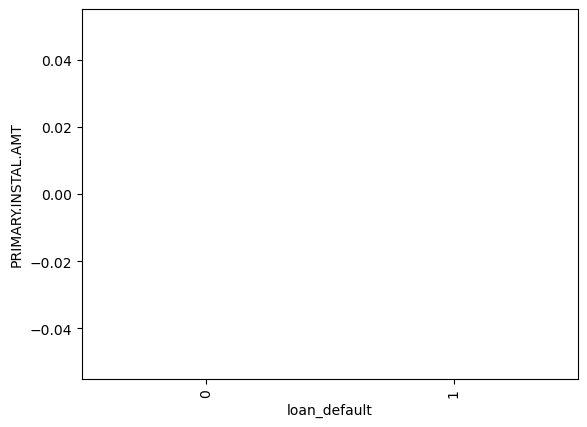

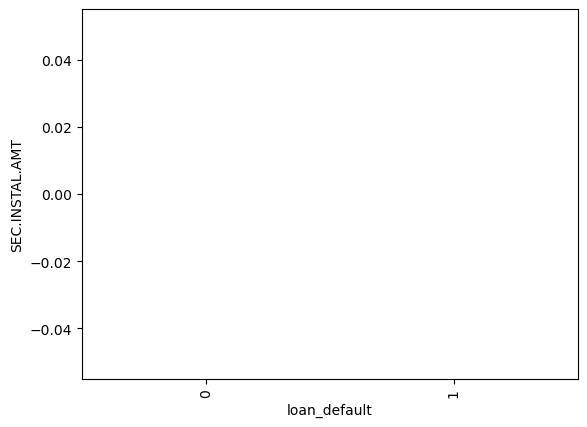

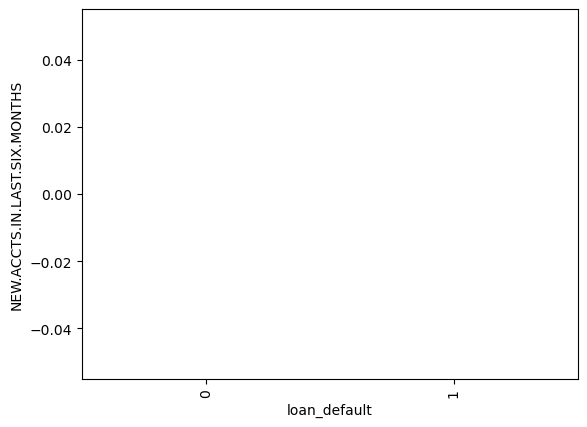

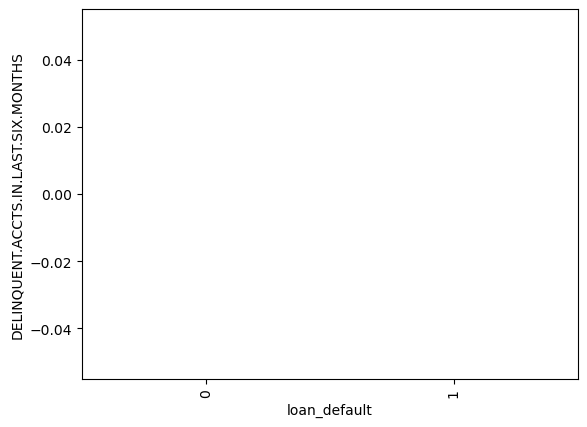

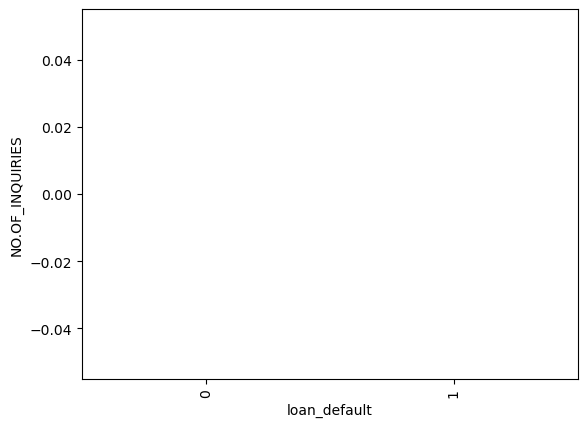

In [28]:
for column in numerical_columns:
    plt.figure()
    
    df.groupby('loan_default')[column].agg('median').plot(kind = 'bar', color = 'magenta', alpha = 0.5)
    plt.ylabel(column)

#### Categorical vs Categorical(Target) column

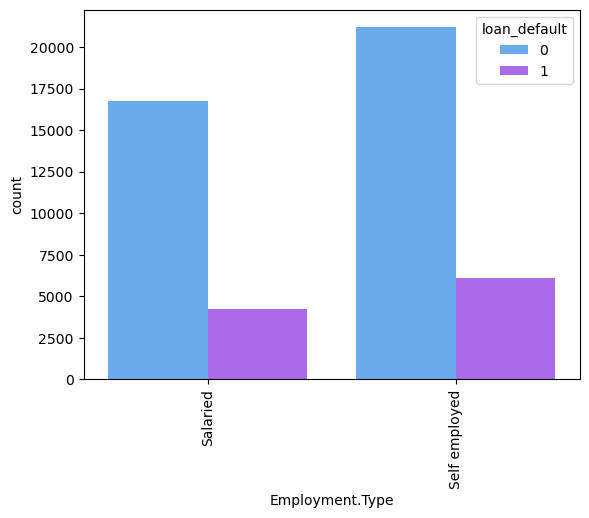

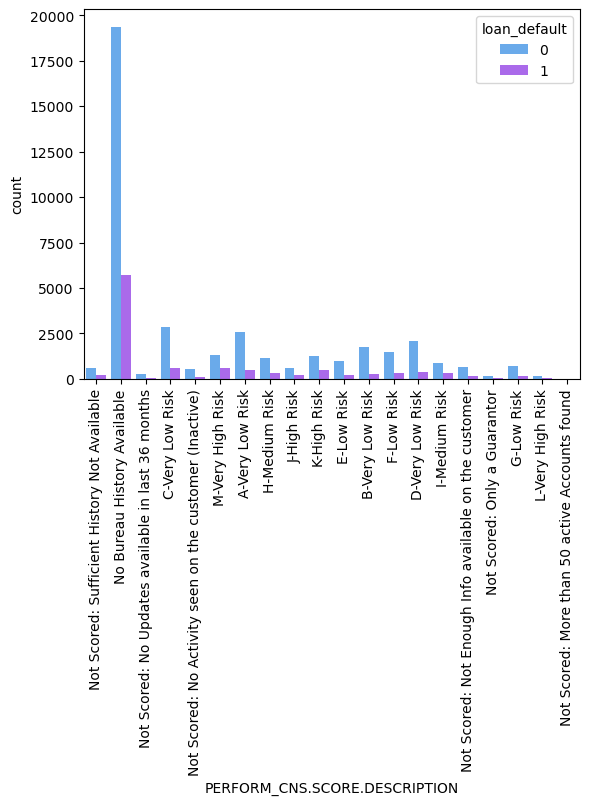

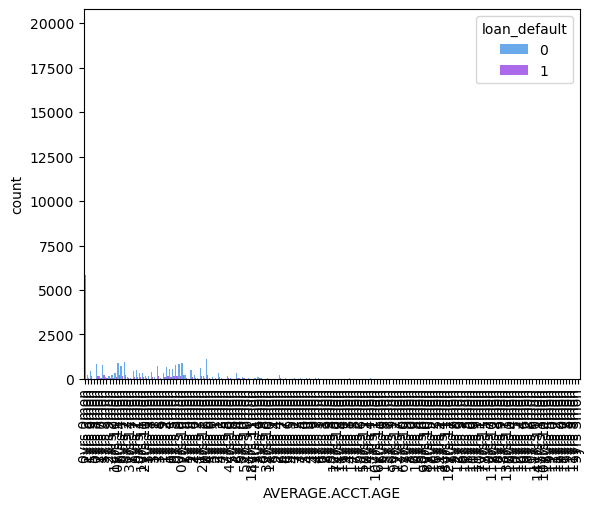

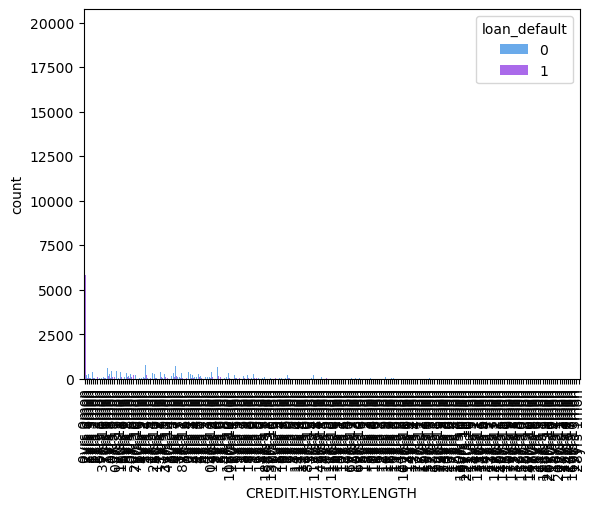

In [29]:
for column  in categorical_columns:
    plt.figure()
    
    sns.countplot(data = df, x = column, hue = 'loan_default', palette = 'cool')
    plt.xticks(rotation = 90)

In [30]:
for column  in categorical_columns:
    
    print()
    print(pd.crosstab(df[column], df['loan_default']))
    print()


loan_default         0     1
Employment.Type             
Salaried         16782  4223
Self employed    21192  6123


loan_default                                            0     1
PERFORM_CNS.SCORE.DESCRIPTION                                  
A-Very Low Risk                                      2595   487
B-Very Low Risk                                      1761   263
C-Very Low Risk                                      2841   576
D-Very Low Risk                                      2091   363
E-Low Risk                                           1005   206
F-Low Risk                                           1455   341
G-Low Risk                                            682   166
H-Medium Risk                                        1141   331
I-Medium Risk                                         852   305
J-High Risk                                           614   207
K-High Risk                                          1246   489
L-Very High Risk                                 

### Linear Separability

In [31]:
# select 10 random columns
# add target to numerical columns
numerical_cols = numerical_columns.columns.tolist() + ['loan_default']

#set index as target
num = df[numerical_cols].set_index('loan_default')

# select 10 random columns
rand_10 = num[np.random.choice(num.columns, 10)]

#reset index
rand_10 = rand_10.reset_index()

#set target hue to categorical
rand_10['loan_default'] = rand_10['loan_default'].astype('object')

In [32]:
#sns.pairplot(rand_10, diag_kind='kde',hue='loan_default', palette='cool')

#### Stats

In [33]:
skews = []
means = []
medians = []
maxs = []
mins = []
skew_type = []
kurts = []
columns = []
diff = []


for column in numerical_columns:
    
    columns.append(column)
    means.append(df[column].mean())
    medians.append(df[column].median())
    kurts.append(df[column].kurt())
    maxs.append(df[column].max())
    mins.append(df[column].min())
    diff.append(df[column].max() - df[column].min())
    skews.append(df[column].skew())
    
    if df[column].mean() > df[column].median():
        skew_type.append('Right_skewed')
        
    elif df[column].mean() < df[column].median():
        skew_type.append('Left_skewed')
        
    else:
        skew_type.append('Normal')
        
        
pd.DataFrame({
    'column':columns,
    'mean':means,
    'median':medians,
    'max':maxs,
    'min':mins,
    'diff':diff,
    'skew':skews,
    'skew_type':skew_type,
    'kurt':kurts,
})

column           mean    median         max  \
0                      disbursed_amount   54318.361480  53759.00    176314.0   
1                            asset_cost   75747.967100  70882.00    260715.0   
2                                   ltv      74.796735     76.92        95.0   
3                     MobileNo_Avl_Flag       1.000000      1.00         1.0   
4                           Aadhar_flag       0.839920      1.00         1.0   
5                              PAN_flag       0.076020      0.00         1.0   
6                          VoterID_flag       0.145840      0.00         1.0   
7                          Driving_flag       0.022880      0.00         1.0   
8                         Passport_flag       0.001980      0.00         1.0   
9                     PERFORM_CNS.SCORE     289.673280      0.00       879.0   
10                      PRI.NO.OF.ACCTS       2.417380      0.00       194.0   
11                     PRI.ACTIVE.ACCTS       1.038040      0.00       144.0   
12                    PRI.OVERDUE.ACCTS       0.155980      0.00        18.0   
13                  PRI.CURRENT.BALANCE  163397.979880      0.00  52367960.0   
14                PRI.SANCTIONED.AMOUNT  211025.660580      0.00  92622816.0   
15                 PRI.DISBURSED.AMOUNT  210089.238520      0.00  92628728.0   
16                      SEC.NO.OF.ACCTS       0.056600      0.00        46.0   
17                     SEC.ACTIVE.ACCTS       0.026240      0.00        26.0   
18                    SEC.OVERDUE.ACCTS       0.007460      0.00         6.0   
19                  SEC.CURRENT.BALANCE    5007.777440      0.00  24692024.0   
20                SEC.SANCTIONED.AMOUNT    6541.478160      0.00  25000000.0   
21                 SEC.DISBURSED.AMOUNT    6412.239780      0.00  25000000.0   
22                   PRIMARY.INSTAL.AMT   12960.951460      0.00  17408822.0   
23                       SEC.INSTAL.AMT     321.231740      0.00   1814000.0   
24         NEW.ACCTS.IN.LAST.SIX.MONTHS       0.378080      0.00        22.0   
25  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS       0.097140      0.00        11.0   
26                      NO.OF_INQUIRIES       0.210160      0.00        36.0   

           min         diff        skew     skew_type          kurt  
0     13369.00    162945.00    0.888710  Right_skewed      3.984056  
1     37000.00    223715.00    2.470381  Right_skewed      9.502739  
2        14.17        80.83   -1.082757   Left_skewed      1.304379  
3         1.00         0.00    0.000000        Normal      0.000000  
4         0.00         1.00   -1.854096   Left_skewed      1.437730  
5         0.00         1.00    3.199582  Right_skewed      8.237651  
6         0.00         1.00    2.006941  Right_skewed      2.027893  
7         0.00         1.00    6.382175  Right_skewed     38.733703  
8         0.00         1.00   22.407200  Right_skewed    500.102618  
9         0.00       879.00    0.446184  Right_skewed     -1.634873  
10        0.00       194.00    6.346417  Right_skewed    101.279694  
11        0.00       144.00   10.205133  Right_skewed    536.407347  
12        0.00        18.00    6.651909  Right_skewed     88.373018  
13 -1108114.00  53476074.00   19.949600  Right_skewed    768.776059  
14        0.00  92622816.00   31.087831  Right_skewed   2044.847606  
15        0.00  92628728.00   31.115562  Right_skewed   2046.312356  
16        0.00        46.00   28.504250  Right_skewed   1302.054913  
17        0.00        26.00   29.404016  Right_skewed   1564.997193  
18        0.00         6.00   20.768698  Right_skewed    603.488293  
19    -4898.00  24696922.00  100.536295  Right_skewed  14268.367983  
20        0.00  25000000.00   84.633605  Right_skewed  10536.411305  
21        0.00  25000000.00   85.212853  Right_skewed  10655.392124  
22        0.00  17408822.00   67.124327  Right_skewed   6834.606316  
23        0.00   1814000.00   90.677027  Right_skewed   9395.401981  
24        0.00        22.00    4.774293  R

### Correlation

<Axes: >

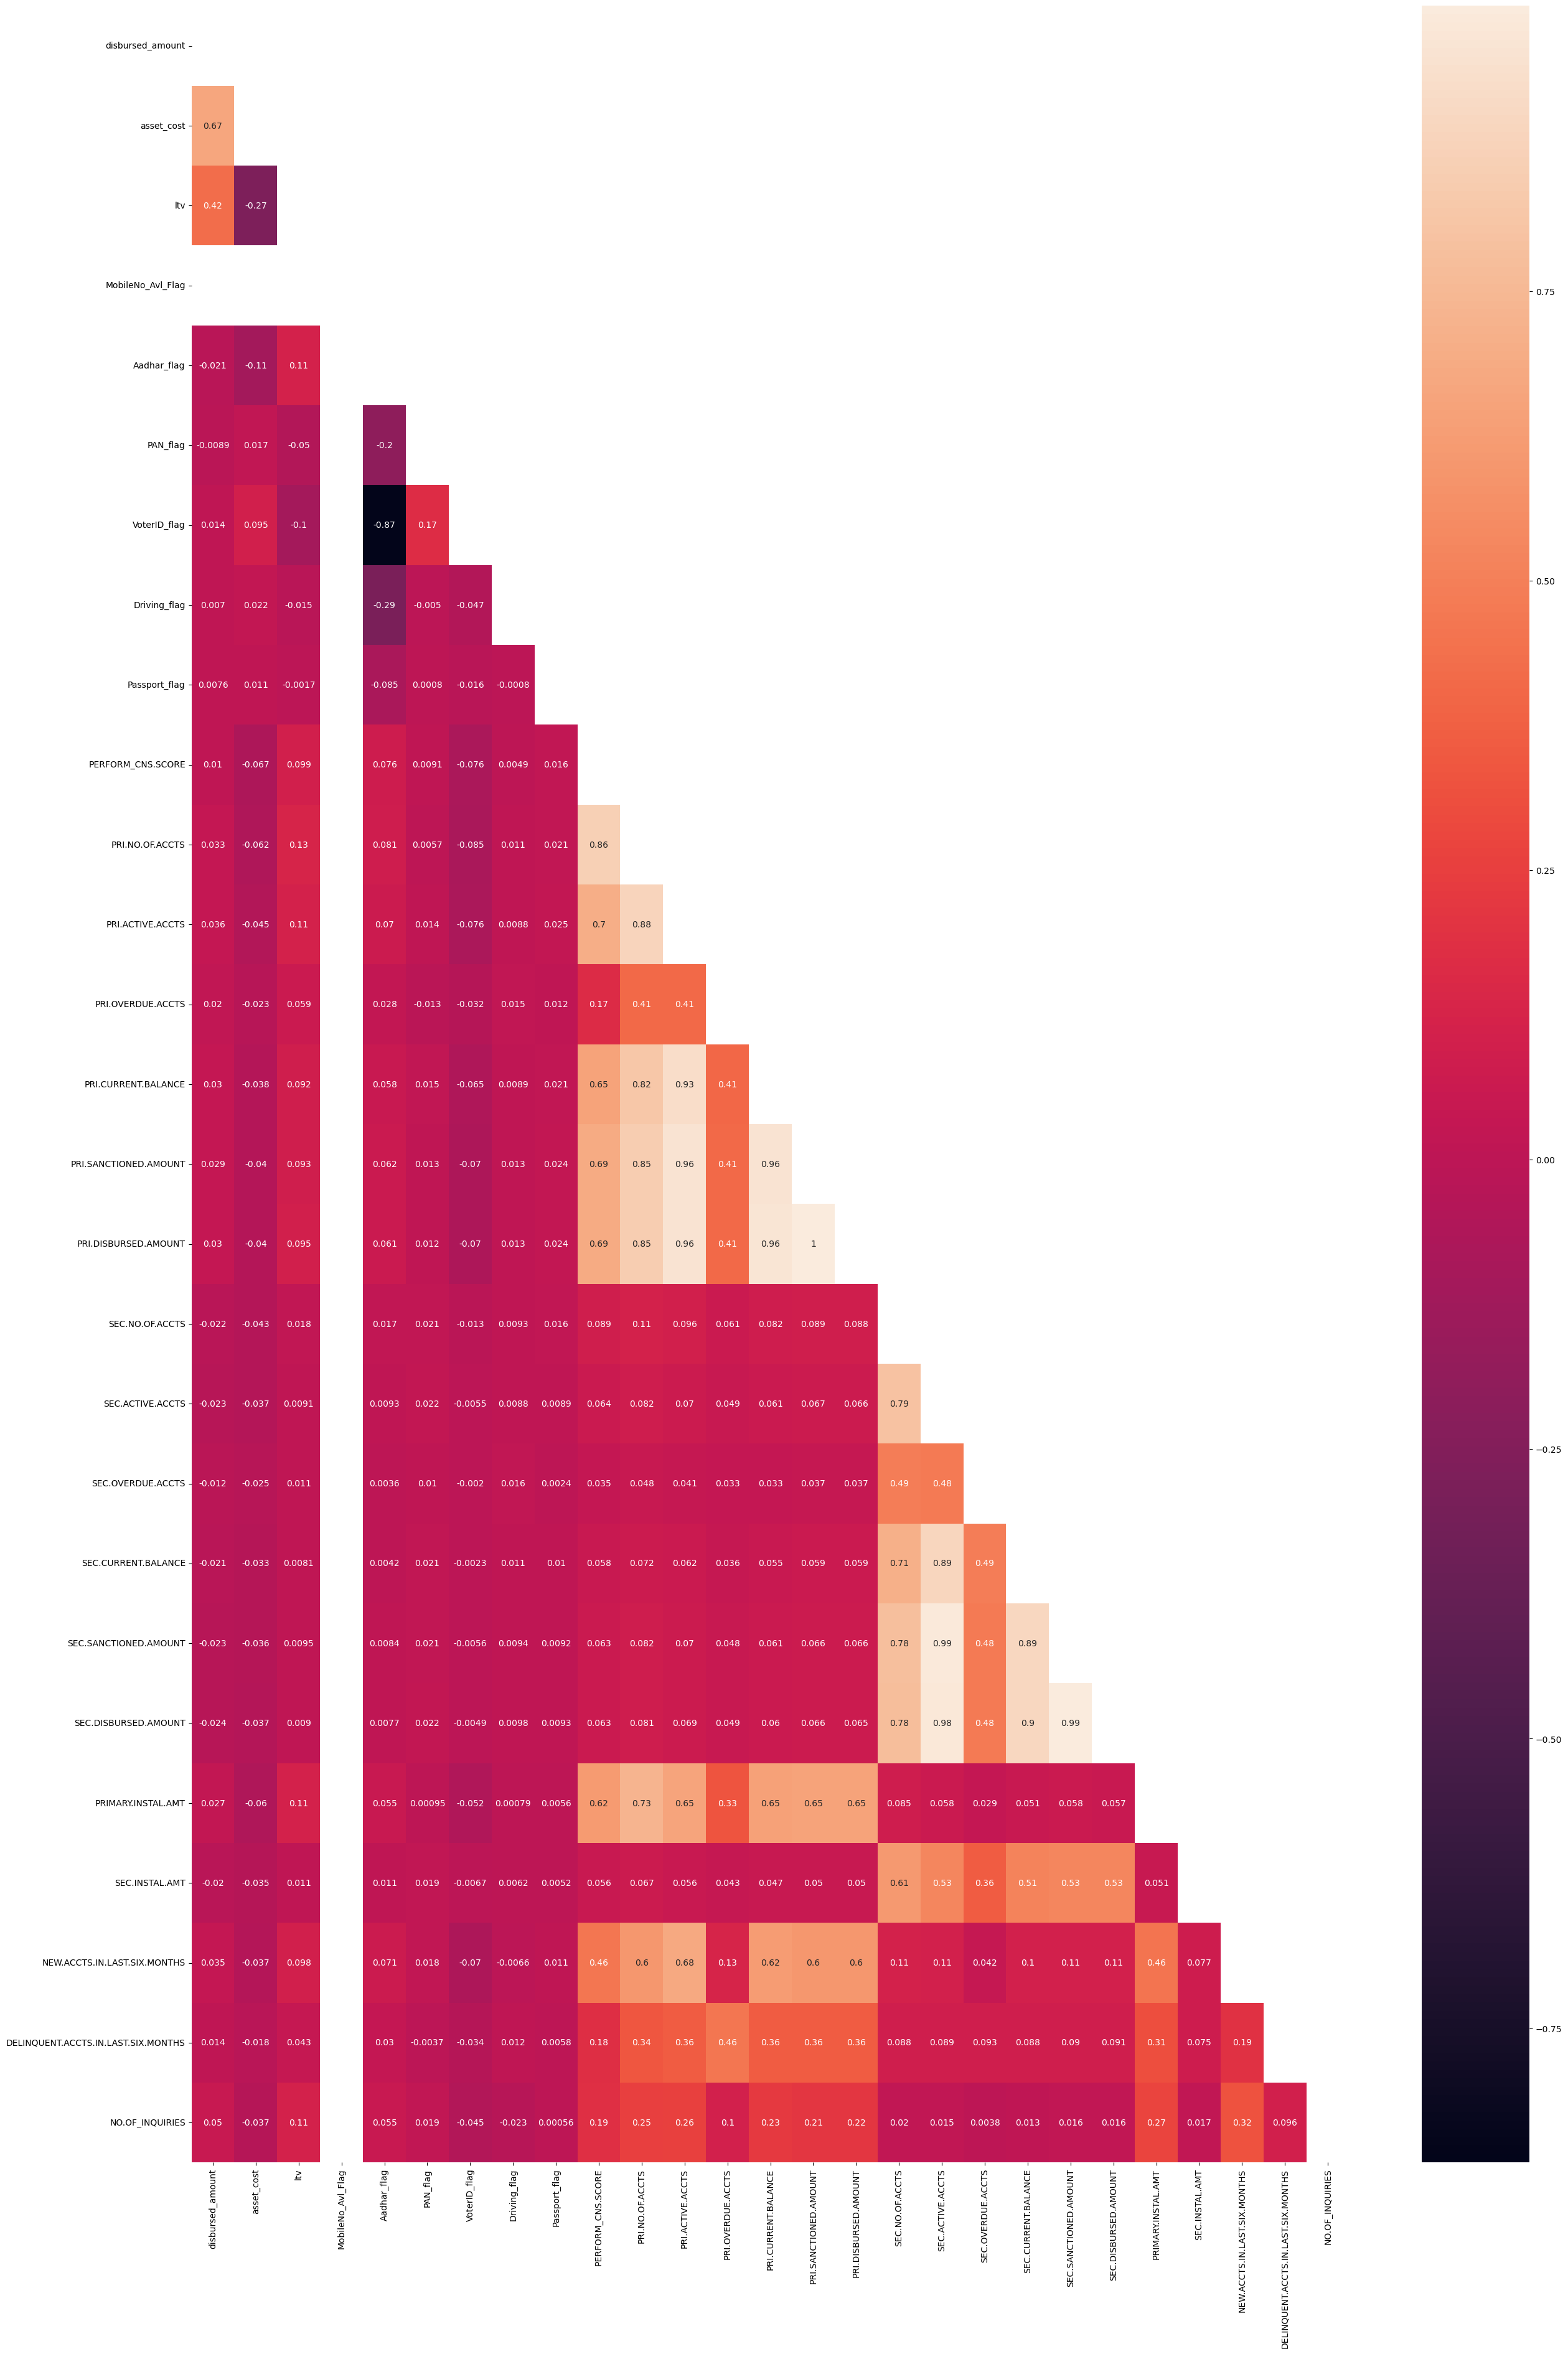

In [34]:
mask = np.triu(numerical_columns.corr(method = 'spearman'))

plt.figure(figsize= (30,45))
sns.heatmap(numerical_columns.corr(method = 'spearman'), mask = mask, annot=True)

### Normality

#### - Shapiro Wilk Test

The Shapiro-Wilk test tests the null hypothesis that the
data was drawn from a normal distribution.

In [35]:
for column in numerical_columns:
    
    pvalue = scipy.stats.shapiro(df[column])[1]
    
    if pvalue<0.05:
        print(f'{column.capitalize()}: We reject the Ho. Data is not normal')
        
    else:
        print(f'{column.capitalize()}: We accept the Ho. Data is  normal') 

Disbursed_amount: We reject the Ho. Data is not normal
Asset_cost: We reject the Ho. Data is not normal
Ltv: We reject the Ho. Data is not normal
Mobileno_avl_flag: We accept the Ho. Data is  normal
Aadhar_flag: We reject the Ho. Data is not normal
Pan_flag: We reject the Ho. Data is not normal
Voterid_flag: We reject the Ho. Data is not normal
Driving_flag: We reject the Ho. Data is not normal
Passport_flag: We reject the Ho. Data is not normal
Perform_cns.score: We reject the Ho. Data is not normal
Pri.no.of.accts: We reject the Ho. Data is not normal
Pri.active.accts: We reject the Ho. Data is not normal
Pri.overdue.accts: We reject the Ho. Data is not normal
Pri.current.balance: We reject the Ho. Data is not normal
Pri.sanctioned.amount: We reject the Ho. Data is not normal
Pri.disbursed.amount: We reject the Ho. Data is not normal
Sec.no.of.accts: We reject the Ho. Data is not normal
Sec.active.accts: We reject the Ho. Data is not normal
Sec.overdue.accts: We reject the Ho. Data i

#### - IQR Proximity Rule

In [36]:
outliers = []
features = []

for column in numerical_columns:
    
    features.append(column)
    
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    
    IQR = Q3 - Q1

    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
    
    outlier = df.loc[np.where(df[column] > upper_limit, True, np.where(df[column] < lower_limit, True, False))]
    outliers.append(len(outlier))
    
pd.DataFrame({
    'columns':features,
    'outliers':outliers
})
        

columns  outliers
0                      disbursed_amount      2164
1                            asset_cost      5381
2                                   ltv      1340
3                     MobileNo_Avl_Flag         0
4                           Aadhar_flag      8004
5                              PAN_flag      3801
6                          VoterID_flag      7292
7                          Driving_flag      1144
8                         Passport_flag        99
9                     PERFORM_CNS.SCORE         0
10                      PRI.NO.OF.ACCTS      4607
11                     PRI.ACTIVE.ACCTS      6949
12                    PRI.OVERDUE.ACCTS      5615
13                  PRI.CURRENT.BALANCE      8941
14                PRI.SANCTIONED.AMOUNT      8558
15                 PRI.DISBURSED.AMOUNT      8558
16                      SEC.NO.OF.ACCTS      1232
17                     SEC.ACTIVE.ACCTS       781
18                    SEC.OVERDUE.ACCTS       300
19                  SEC.CURRENT.BALANCE       676
20                SEC.SANCTIONED.AMOUNT       761
21                 SEC.DISBURSED.AMOUNT       750
22                   PRIMARY.INSTAL.AMT      8342
23                       SEC.INSTAL.AMT       461
24         NEW.ACCTS.IN.LAST.SIX.MONTHS     11056
25  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS      3854
26                      NO.OF_INQUIRIES      6844

## Data Cleaning

In [180]:
def clean_column(dataframe):
    
    '''Clean up column names, remove period and whitespaces
       Input: list - all columns
       Output: dataframe'''
    
    dataframe.columns = dataframe.columns.str.replace('.', '_')
    return dataframe

In [181]:
def calculate_age(dataframe):
    
    '''Calculate age from date of birth
       Calculate Years_since_last_disbursal_date from DisbursalDate
       Input: list - all columns
       Output: dataframe'''
    
    for column in dataframe:
        
        dataframe[column] = pd.to_datetime(dataframe[column], format = '%d-%m-%y')

        if column == 'Date.of.Birth':
            diff = datetime.today().year 
            dataframe['Client_age'] = dataframe[column].apply(lambda x: x if pd.isnull(x) else diff-x.year)
            dataframe.drop(['Date.of.Birth'], axis=1, inplace=True)
            
        elif column == 'DisbursalDate':
            diff = datetime.today().year 

            dataframe['Years_since_last_disbursal_date'] = dataframe[column].apply(lambda x: x if pd.isnull(x) else diff-x.year)
            dataframe.drop(['DisbursalDate'], axis=1, inplace=True)
            
    return dataframe

In [182]:
def clean_date_column(dataframe):
    
    '''Convert date column to datetime, extract year, month, day and day name
       Input: list - date columns
       Output: extracted date components in dataframe'''
    
    for column in dataframe:
        
        dataframe[column] = pd.to_datetime(dataframe[column], format = '%d-%m-%y')
        
        dataframe[column + '_year'] = dataframe[column].dt.year
        dataframe[column + '_month'] = dataframe[column].dt.month
        dataframe[column + '_day'] = dataframe[column].dt.day
        dataframe[column + '_dayname'] = dataframe[column].dt.day_name()
        
        dataframe.drop([column], axis = 1, inplace = True)
    
    return dataframe

In [183]:
def clean_PERFORM_CNS_SCORE_DESCRIPTION(dataframe):
    
    """Clean up PERFORM_CNS_SCORE_DESCRIPTION and reducing cardinality
       Input: list - PERFORM_CNS_SCORE_DESCRIPTION column
       Output: column cleaned"""
    
    for column in dataframe:
        dataframe[column] = dataframe[column].replace({
            'No Bureau History Available':np.nan,
            'C-Very Low Risk': 'Low Risk',
            'D-Very Low Risk': 'Low Risk',
            'B-Very Low Risk': 'Low Risk',
            'M-Very Low Risk': 'Low Risk',
            'A-Very Low Risk': 'Low Risk',
            'F-Low Risk': 'Low Risk',
            'K-High Risk': 'High Risk',
            'H-Medium Risk': 'Medium Risk',
            'E-Low Risk': 'Low Risk',
            'I-Medium Risk ': 'Medium Risk',
            'G-Low Risk': 'Low Risk',
            'Not Scored: Sufficient History Not Available': np.nan,
            'Not Scored: Not Enough Info available on the customer': np.nan,
            'J-High Risk': 'High Risk',
            'Not Scored: No Activity seen on the customer (Inactive)': np.nan,
            'Not Scored: No Updates available in last 36 months': np.nan,
            'L-Very High Risk': 'High Risk',
            'Not Scored': np.nan,
        })
        
    return dataframe

In [184]:
def clean_AVERAGE_ACCT_AGE_CREDIT_HISTORY_LENGTH(dataframe):
    
    '''Clean up AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH. Return the first element as set type on int'''
    
    for column in dataframe:
        
        dataframe[column] = dataframe[column].apply(lambda x: x if pd.isnull(x) else int(x[0]))
        
    return dataframe

In [185]:
def sum_all_documents(dataframe):
    
    '''Sum all documents into one column
       Input: document columns- MobileNo_Avl_Flag	Aadhar_flag	PAN_flag	VoterID_flag	Driving_flag	Passport_flag	
       Output: summed column'''
    
    dataframe['num_of_documents'] = dataframe[:].sum(axis=1)
    
    for column in dataframe:
        if column != 'num_of_documents':
            dataframe.drop([column], axis=1, inplace=True)
    return dataframe

In [186]:
date_columns = ['Date.of.Birth', 'DisbursalDate']

acct_age_credit_hist = ['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']

cns_col = ['PERFORM_CNS.SCORE.DESCRIPTION',]

all_columns = df.columns.tolist()

documents_cols = ['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag']

In [261]:
clean_column_ = FunctionTransformer(clean_column, validate=False)

calculate_age_ = FunctionTransformer(calculate_age, validate=False)

clean_date_column_ = FunctionTransformer(clean_date_column, validate=False)

clean_PERFORM_CNS_SCORE_DESCRIPTION_ = FunctionTransformer(clean_PERFORM_CNS_SCORE_DESCRIPTION, validate=False)

clean_AVERAGE_ACCT_AGE_CREDIT_HISTORY_LENGTH_ = FunctionTransformer(clean_AVERAGE_ACCT_AGE_CREDIT_HISTORY_LENGTH, validate=False)

sum_all_documents_ = FunctionTransformer(sum_all_documents, validate=False)

In [262]:
data_cleaning_pipeline = ColumnTransformer([
    ('calc_age', calculate_age_, date_columns),
    #('clean_years', clean_years_, date_columns),
    ('clean_date_column', clean_date_column_, date_columns),
    ('clean_cns', clean_PERFORM_CNS_SCORE_DESCRIPTION_,cns_col),
    ('clean_acct_crdt', clean_AVERAGE_ACCT_AGE_CREDIT_HISTORY_LENGTH_,acct_age_credit_hist ),
    ('summed', sum_all_documents_, documents_cols),
],
    remainder='passthrough',    verbose_feature_names_out=False,

)

In [263]:
xtrain_full, ytrain_full = full_train.drop(['loan_default'], axis = 1), full_train['loan_default']
xtrain_red, ytrain_red = reduced_train.drop(['loan_default'], axis = 1), reduced_train['loan_default']
xtest, ytest = test.drop(['loan_default'], axis = 1), test['loan_default']
xval, yval = validation.drop(['loan_default'], axis = 1), validation['loan_default']


In [264]:
data_cleaning_pipeline.fit(xtrain_full, ytrain_full)

ColumnTransformer(remainder='passthrough',
                  transformers=[('calc_age',
                                 FunctionTransformer(func=<function calculate_age at 0x0000025094FC48B0>),
                                 ['Date.of.Birth', 'DisbursalDate']),
                                ('clean_date_column',
                                 FunctionTransformer(func=<function clean_date_column at 0x0000025094FC49D0>),
                                 ['Date.of.Birth', 'DisbursalDate']),
                                ('clean_cns',
                                 FunctionTransformer(func=<function...
                                 FunctionTransformer(func=<function clean_AVERAGE_ACCT_AGE_CREDIT_HISTORY_LENGTH at 0x0000025094FC4CA0>),
                                 ['AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH']),
                                ('summed',
                                 FunctionTransformer(func=<function sum_all_documents at 0x00000250ADCAEE60>),
                                 ['MobileNo_Avl_Flag', 'Aadhar_flag',
                                  'PAN_flag', 'VoterID_flag', 'Driving_flag',
                                  'Passport_flag'])],
                  verbose_feature_names_out=False)

In [265]:
full_train_transformed = data_cleaning_pipeline.transform(xtrain_full)

test_transformed = data_cleaning_pipeline.transform(xtest)

reduced_train_transformed = data_cleaning_pipeline.transform(xtrain_red)

validation_transformed = data_cleaning_pipeline.transform(xval)

### Clean column names

In [266]:
full_train_transformed = clean_column_.fit_transform(full_train_transformed)

test_transformed = clean_column_.transform(test_transformed)

reduced_train_transformed = clean_column_.transform(reduced_train_transformed)

validation_transformed = clean_column_.transform(validation_transformed)

### Remove Invalid years

In [267]:
year_now = datetime.today().year

#removing invalid dates
full_train_transformed['Date_of_Birth_year'] = np.where(full_train_transformed['Date_of_Birth_year']>year_now, year_now, full_train_transformed['Date_of_Birth_year'])
full_train_transformed['DisbursalDate_year'] = np.where(full_train_transformed['DisbursalDate_year']>year_now, year_now, full_train_transformed['DisbursalDate_year'])

In [268]:
#removing invalid dates
test_transformed['Date_of_Birth_year'] = np.where(test_transformed['Date_of_Birth_year']>year_now, year_now, test_transformed['Date_of_Birth_year'])
test_transformed['DisbursalDate_year'] = np.where(test_transformed['DisbursalDate_year']>year_now, year_now, test_transformed['DisbursalDate_year'])

In [269]:
#removing invalid dates
reduced_train_transformed['Date_of_Birth_year'] = np.where(reduced_train_transformed['Date_of_Birth_year']>year_now, year_now, reduced_train_transformed['Date_of_Birth_year'])
reduced_train_transformed['DisbursalDate_year'] = np.where(reduced_train_transformed['DisbursalDate_year']>year_now, year_now, reduced_train_transformed['DisbursalDate_year'])

In [270]:
#removing invalid dates
validation_transformed['Date_of_Birth_year'] = np.where(validation_transformed['Date_of_Birth_year']>year_now, year_now, validation_transformed['Date_of_Birth_year'])
validation_transformed['DisbursalDate_year'] = np.where(validation_transformed['DisbursalDate_year']>year_now, year_now, validation_transformed['DisbursalDate_year'])

# Preprocessor method & Model Selection

# Experiment 0

In [54]:
xtrain_0 = reduced_train_transformed.copy()
ytrain_red_0 = ytrain_red.copy()


cat_cols = reduced_train_transformed.select_dtypes('O').columns.tolist()
num_cols = reduced_train_transformed.select_dtypes('number').columns.tolist()
#ytrain_red

In [55]:
xtrain_0[:1]

Client_age  Years_since_last_disbursal_date  Date_of_Birth_year  \
218761          39                                5                1984   

        Date_of_Birth_month  Date_of_Birth_day Date_of_Birth_dayname  \
218761                    3                 12                Monday   

        DisbursalDate_year  DisbursalDate_month  DisbursalDate_day  \
218761                2018                    8                 20   

       DisbursalDate_dayname PERFORM_CNS_SCORE_DESCRIPTION  AVERAGE_ACCT_AGE  \
218761                Monday                      Low Risk                 0   

        CREDIT_HISTORY_LENGTH  num_of_documents  UniqueID  disbursed_amount  \
218761                      2                 2    449259             46149   

        asset_cost    ltv  branch_id  supplier_id  manufacturer_id  \
218761       65584  73.19         68        16603              120   

        Current_pincode_ID Employment_Type  State_ID  Employee_code_ID  \
218761                 852   Self employed         6              3085   

        PERFORM_CNS_SCORE  PRI_NO_OF_ACCTS  PRI_ACTIVE_ACCTS  \
218761                636                6                 5   

        PRI_OVERDUE_ACCTS  PRI_CURRENT_BALANCE  PRI_SANCTIONED_AMOUNT  \
218761                  0               250010                 308690   

        PRI_DISBURSED_AMOUNT  SEC_NO_OF_ACCTS  SEC_ACTIVE_ACCTS  \
218761                309294                0                 0   

        SEC_OVERDUE_ACCTS  SEC_CURRENT_BALANCE  SEC_SANCTIONED_AMOUNT  \
218761                  0                    0                      0   

        SEC_DISBURSED_AMOUNT  PRIMARY_INSTAL_AMT  SEC_INSTAL_AMT  \
218761                     0                3157               0   

        NEW_ACCTS_IN_LAST_SIX_MONTHS  DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  \
218761                             3                                    0   

        NO_OF_INQUIRIES  
218761                4

In [56]:
# Define a custom transformer that adds a small constant before log transformation
def log1p_safe(dataframe):
    
    for column in dataframe:
        dataframe[column] = np.where(dataframe[column]>0, np.log(dataframe[column]), dataframe[column])
    return dataframe
    
    
log_transformer = FunctionTransformer(log1p_safe)

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder())
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('transformer', log_transformer),
    ('scaler', StandardScaler())
])


preprocessor_0 = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
],
    verbose_feature_names_out = False
)

In [57]:
xtrain_0 = preprocessor_0.fit_transform(xtrain_0)

In [58]:
xtrain_0[:2]

Client_age  Years_since_last_disbursal_date  Date_of_Birth_year  \
218761    0.309754                     4.440892e-16           -0.380748   
25035     0.291351                     4.440892e-16            0.242439   

        Date_of_Birth_month  Date_of_Birth_day  DisbursalDate_year  \
218761            -0.167651           0.626831        1.776357e-15   
25035             -0.607224          -0.046712        1.776357e-15   

        DisbursalDate_month  DisbursalDate_day  AVERAGE_ACCT_AGE  \
218761            -1.377494           0.240909         -0.341444   
25035              1.026393          -0.023516         -0.341444   

        CREDIT_HISTORY_LENGTH  num_of_documents  UniqueID  disbursed_amount  \
218761               0.820119         -0.303298 -1.304579         -0.584723   
25035                0.820119         -0.303298  0.727303         -1.152497   

        asset_cost       ltv  branch_id  supplier_id  manufacturer_id  \
218761   -0.592987 -0.039227   0.451204    -0.821786         1.866869   
25035    -0.534920 -1.000874   0.888426     1.081042        -1.165298   

        Current_pincode_ID  State_ID  Employee_code_ID  PERFORM_CNS_SCORE  \
218761           -0.857672  0.019498          1.013432           1.102821   
25035            -0.677423  0.019498         -0.340540           1.145106   

        PRI_NO_OF_ACCTS  PRI_ACTIVE_ACCTS  PRI_OVERDUE_ACCTS  \
218761         1.444597          2.448316          -0.154875   
25035          1.622977          2.448316          -0.154875   

        PRI_CURRENT_BALANCE  PRI_SANCTIONED_AMOUNT  PRI_DISBURSED_AMOUNT  \
218761             0.009937               1.341244              1.346854   
25035              0.010186               1.676068              1.681952   

        SEC_NO_OF_ACCTS  SEC_ACTIVE_ACCTS  SEC_OVERDUE_ACCTS  \
218761        -0.089923         -0.062973          -0.028085   
25035         -0.089923         -0.062973          -0.028085   

        SEC_CURRENT_BALANCE  SEC_SANCTIONED_AMOUNT  SEC_DISBURSED_AMOUNT  \
218761             0.004461              -0.123794             -0.122967   
25035              0.004461              -0.123794             -0.122967   

        PRIMARY_INSTAL_AMT  SEC_INSTAL_AMT  NEW_ACCTS_IN_LAST_SIX_MONTHS  \
218761            1.253097       -0.094841                      3.475221   
25035             1.606078       -0.094841                     -0.279263   

        DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  NO_OF_INQUIRIES  \
218761                            -0.113689         6.673306   
25035                             -0.113689        -0.185116   

        Date_of_Birth_dayname_1  Date_of_Birth_dayname_2  \
218761                        1                        0   
25035                         0                        1   

        Date_of_Birth_dayname_3  Date_of_Birth_dayname_4  \
218761                        0                        0   
25035                         0                        0   

        Date_of_Birth_dayname_5  Date_of_Birth_dayname_6  \
218761                        0                        0   
25035                         0                        0   

        Date_of_Birth_dayname_7  DisbursalDate_dayname_1  \
218761                        0                        1   
25035                         0                        0   

        DisbursalDate_dayname_2  DisbursalDate_dayname_3  \
218761                        0                        0   
25035                         1                        0   

        DisbursalDate_dayname_4  DisbursalDate_dayname_5  \
218761                        0                        0   
25035                         0                        0   

        DisbursalDate_dayname_6  DisbursalDate_dayname_7  \
218761                        0                        0   
25035                         0                        0   

        PERFORM_CNS_SCORE_DESCRIPTION_1  PERFORM_CNS_SCORE_DESCRIPTION_2  \
218761                                1                            

### Model Selection

In [59]:
models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('Adaboost', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('Forest', RandomForestClassifier()))
models.append(('ExT', ExtraTreesClassifier()))

In [60]:
names = []
scores = []

for name, model in models:
    
    names.append(name)
    
    score = cross_val_score(model, xtrain_0, ytrain_red_0, cv = 5, scoring = 'roc_auc')
    
    scores.append(score.mean())
    
    print(f'{name.capitalize()}: Mean - {score.mean()}\nStd - {score.std()}\n')

Lda: Mean - 0.6349169270599404
Std - 0.0047867529344358985

Knn: Mean - 0.5520549889325284
Std - 0.0035298848059808264

Tree: Mean - 0.5278801088977478
Std - 0.003157912019007342

Nb: Mean - 0.6076308490469924
Std - 0.004557474360979131

Adaboost: Mean - 0.6514591797937384
Std - 0.0034683021350714214

Gbm: Mean - 0.6588177224904441
Std - 0.003752972736660604

Forest: Mean - 0.6368549516772652
Std - 0.00224111498850929

Ext: Mean - 0.6184428323266322
Std - 0.0023370111414169627



# Experiment 1

In [130]:
xtrain_1 = reduced_train_transformed.copy()
ytrain_red_1 = ytrain_red.copy()

In [131]:
def imputer_end_of_dist(dataframe):
    
    for column in dataframe:
        
        Q3 = dataframe[column].quantile(0.75)
        Q1 = dataframe[column].quantile(0.25)
        
        IQR = Q3 - Q1 
        
        upper_limit = (1.5*IQR) + Q3
        
        dataframe[column] = np.where(dataframe[column].isnull(), upper_limit, dataframe[column])
        
    return dataframe

dist_imputer = FunctionTransformer(imputer_end_of_dist, validate = False)




def sqrt(dataframe):
    
    for column in dataframe:
        dataframe[column] = np.where(dataframe[column]>0, np.sqrt(dataframe[column]), dataframe[column])
        
    return dataframe

sqrt_transformer = FunctionTransformer(sqrt) 

In [132]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', TargetEncoder())
])

num_pipeline = Pipeline([
    ('imputer', dist_imputer),
    ('transformer', sqrt_transformer),
    ('scaler', MaxAbsScaler())
])


preprocessor_1 = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
    
],verbose_feature_names_out = False )

In [133]:
xtrain_1 = preprocessor_1.fit_transform(xtrain_1, ytrain_red_1)

In [134]:
xtrain_1[:2]

Client_age  Years_since_last_disbursal_date  Date_of_Birth_year  \
218761    0.081412                              1.0            0.997443   
25035     0.076311                              1.0            0.997971   

        Date_of_Birth_month  Date_of_Birth_day  DisbursalDate_year  \
218761             0.442114           0.723621                 1.0   
25035              0.278943           0.468679                 1.0   

        DisbursalDate_month  DisbursalDate_day  AVERAGE_ACCT_AGE  \
218761              0.90309           0.872377               0.0   
25035               1.00000           0.825051               0.0   

        CREDIT_HISTORY_LENGTH  num_of_documents  UniqueID  disbursed_amount  \
218761               0.315465          0.430677  0.970090          0.777894   
25035                0.315465          0.430677  0.989615          0.768246   

        asset_cost       ltv  branch_id  supplier_id  manufacturer_id  \
218761    0.775412  0.942726   0.758288     0.960333         0.951705   
25035     0.776251  0.905474   0.874745     0.994931         0.756726   

        Current_pincode_ID  State_ID  Employee_code_ID  PERFORM_CNS_SCORE  \
218761            0.758005  0.579662          0.974867           0.950521   
25035             0.781478  0.579662          0.808646           0.970010   

        PRI_NO_OF_ACCTS  PRI_ACTIVE_ACCTS  PRI_OVERDUE_ACCTS  \
218761         0.292968          0.323843                0.0   
25035          0.318173          0.323843                0.0   

        PRI_CURRENT_BALANCE  PRI_SANCTIONED_AMOUNT  PRI_DISBURSED_AMOUNT  \
218761             0.000006               0.609947              0.610041   
25035              0.000007               0.704756              0.704756   

        SEC_NO_OF_ACCTS  SEC_ACTIVE_ACCTS  SEC_OVERDUE_ACCTS  \
218761              0.0               0.0                0.0   
25035               0.0               0.0                0.0   

        SEC_CURRENT_BALANCE  SEC_SANCTIONED_AMOUNT  SEC_DISBURSED_AMOUNT  \
218761                  0.0                    0.0                   0.0   
25035                   0.0                    0.0                   0.0   

        PRIMARY_INSTAL_AMT  SEC_INSTAL_AMT  NEW_ACCTS_IN_LAST_SIX_MONTHS  \
218761            0.472303             0.0                      0.329695   
25035             0.559265             0.0                      0.000000   

        DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  NO_OF_INQUIRIES  \
218761                                  0.0         0.386853   
25035                                   0.0         0.000000   

        Date_of_Birth_dayname  DisbursalDate_dayname  \
218761               0.215349               0.214901   
25035                0.217781               0.231145   

        PERFORM_CNS_SCORE_DESCRIPTION  Employment_Type  
218761                        0.20676         0.226634  
25035                         0.20676         0.226634

#### Feature selection


In [110]:
#feature selection
lasso = RFE(Lasso(),)
lasso.fit(xtrain_1, ytrain_red_1)

selected_features_1 = xtrain_1.columns[lasso.get_support()]
#print(selected_features_1)
#print(lasso.get_support())
xtrain_1 = xtrain_1[selected_features_1]

#### Resampling

In [111]:
# undersampling

temp = pd.concat([xtrain_1, ytrain_red_1], axis=1)

default_0 = temp[temp['loan_default'] == 0]
default_1 = temp[temp['loan_default'] == 1]

print(len(default_0), len(default_1))

116810 32408


In [113]:
default_0 = default_0[:32408]

new_temp = pd.concat([default_0, default_1])
new_temp = new_temp.sample(frac= 1, random_state= 0)

xtrain_1 = new_temp.drop(['loan_default'],axis=1)
ytrain_red_1 = new_temp['loan_default']

In [115]:
models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

models.append(('Adaboost', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('Forest', RandomForestClassifier()))
models.append(('ExT', ExtraTreesClassifier()))

In [116]:
names = []
scores = []

for name, model in models:
    
    names.append(name)
    
    score = cross_val_score(model, xtrain_1, ytrain_red_1, cv = 5, scoring = 'roc_auc', error_score='raise')
    
    scores.append(score.mean())
    
    print(f'{name.capitalize()}: Mean - {score.mean()}\nStd - {score.std()}\n')

Lda: Mean - 0.5734556192723145
Std - 0.0030549960560624866

Knn: Mean - 0.5352235547618874
Std - 0.004217337024419701

Tree: Mean - 0.5257378618429827
Std - 0.004910650851235332

Nb: Mean - 0.5686053931151587
Std - 0.003427651929230526

Adaboost: Mean - 0.578013242918576
Std - 0.0033254969503059588

Gbm: Mean - 0.5824944377562702
Std - 0.0038830396579684024

Forest: Mean - 0.5660280540363243
Std - 0.0029671709761668265

Ext: Mean - 0.5562388874157435
Std - 0.005265129124078858



# Experiment 2

In [226]:
xtrain_2 = reduced_train_transformed.copy()
ytrain_red_2 = ytrain_red.copy()

xtrain_2[:2]

Client_age  Years_since_last_disbursal_date  Date_of_Birth_year  \
218761          39                                5                1984   
25035           31                                5                1992   

        Date_of_Birth_month  Date_of_Birth_day Date_of_Birth_dayname  \
218761                    3                 12                Monday   
25035                     2                  5             Wednesday   

        DisbursalDate_year  DisbursalDate_month  DisbursalDate_day  \
218761                2018                    8                 20   
25035                 2018                   10                 17   

       DisbursalDate_dayname PERFORM_CNS_SCORE_DESCRIPTION  AVERAGE_ACCT_AGE  \
218761                Monday                      Low Risk                 0   
25035              Wednesday                      Low Risk                 1   

        CREDIT_HISTORY_LENGTH  num_of_documents  UniqueID  disbursed_amount  \
218761                      2                 2    449259             46149   
25035                       2                 2    583804             40394   

        asset_cost    ltv  branch_id  supplier_id  manufacturer_id  \
218761       65584  73.19         68        16603              120   
25035        66376  61.77        130        23563               45   

        Current_pincode_ID Employment_Type  State_ID  Employee_code_ID  \
218761                 852   Self employed         6              3085   
25035                 1050   Self employed         6               784   

        PERFORM_CNS_SCORE  PRI_NO_OF_ACCTS  PRI_ACTIVE_ACCTS  \
218761                636                6                 5   
25035                 726                7                 5   

        PRI_OVERDUE_ACCTS  PRI_CURRENT_BALANCE  PRI_SANCTIONED_AMOUNT  \
218761                  0               250010                 308690   
25035                   0              2025274                2201928   

        PRI_DISBURSED_AMOUNT  SEC_NO_OF_ACCTS  SEC_ACTIVE_ACCTS  \
218761                309294                0                 0   
25035                2201928                0                 0   

        SEC_OVERDUE_ACCTS  SEC_CURRENT_BALANCE  SEC_SANCTIONED_AMOUNT  \
218761                  0                    0                      0   
25035                   0                    0                      0   

        SEC_DISBURSED_AMOUNT  PRIMARY_INSTAL_AMT  SEC_INSTAL_AMT  \
218761                     0                3157               0   
25035                      0               13918               0   

        NEW_ACCTS_IN_LAST_SIX_MONTHS  DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  \
218761                             3                                    0   
25035                              0                                    0   

        NO_OF_INQUIRIES  
218761                4  
25035                 0

In [206]:
def random_sample_imputation(dataframe):
    
    for column in dataframe:
        
        nans_sample = dataframe[column].isnull().sum()
        
        samples = dataframe[column].dropna().sample(nans_sample, random_state = 0, replace=True)
        
        samples.index = dataframe[dataframe[column].isnull()].index
        
        dataframe.loc[dataframe[column].isnull(), column] = samples
        
    return dataframe

random_sample_imputer = FunctionTransformer(random_sample_imputation, validate = False)

In [207]:
cat_pipeline = Pipeline([
    ('imputer', random_sample_imputer),
    ('encoder', OrdinalEncoder())
])

num_pipeline = Pipeline([
    ('imputer', random_sample_imputer),
    ('transformer', PowerTransformer(method = 'yeo-johnson')),
    ('scaler', RobustScaler())
])


preprocessor_2 = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
    
],verbose_feature_names_out = False )

In [208]:
xtrain_2 = preprocessor_2.fit_transform(xtrain_2, ytrain_red_2)

#### Feature Selection

In [209]:
rfe = RFE(DecisionTreeClassifier())

rfe.fit(xtrain_2, ytrain_red_2)

selected_features_2 = xtrain_2.columns[rfe.get_support()]
print(selected_features_2)

Index(['Client_age', 'Date_of_Birth_month', 'Date_of_Birth_day',
       'DisbursalDate_day', 'UniqueID', 'disbursed_amount', 'asset_cost',
       'ltv', 'branch_id', 'supplier_id', 'Current_pincode_ID', 'State_ID',
       'Employee_code_ID', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'Date_of_Birth_dayname', 'DisbursalDate_dayname'],
      dtype='object')


In [210]:
xtrain_2 = xtrain_2[selected_features_2]

#### Resampling - SMOTE

In [211]:
smote = SMOTE()

xtrain_2, ytrain_red_2 = smote.fit_resample(xtrain_2, ytrain_red_2)

In [212]:
models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('Adaboost', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('Forest', RandomForestClassifier()))
models.append(('ExT', ExtraTreesClassifier()))

In [213]:
names = []
scores = []

for name, model in models:
    
    names.append(name)
    
    score = cross_val_score(model, xtrain_2, ytrain_red_2, cv = 5, scoring = 'roc_auc')
    
    scores.append(score.mean())
    
    print(f'{name.capitalize()}: Mean - {score.mean()}\nStd - {score.std()}\n')

Lda: Mean - 0.6226871701789255
Std - 0.008319163971910223

Knn: Mean - 0.858111454631412
Std - 0.031058793167231695

Tree: Mean - 0.7578674770995635
Std - 0.10156390931316768

Nb: Mean - 0.618848438244996
Std - 0.02107343480463027

Adaboost: Mean - 0.7551514683918982
Std - 0.08808740905156828

Gbm: Mean - 0.8589354025443121
Std - 0.1366541258114464

Forest: Mean - 0.9302419248480721
Std - 0.08412497380796512

Ext: Mean - 0.9591195733446055
Std - 0.04581836493872932



# Experiment 3

In [271]:
xtrain_3 = reduced_train_transformed.copy()
ytrain_red_3 = ytrain_red.copy()

len(xtrain_3), len(ytrain_red)

(149218, 149218)

In [272]:
def count_encoding(dataframe):
    
    for column in dataframe:
        
        count_map = dataframe[column].value_counts().to_dict()
        
        dataframe[column] = dataframe[column].map(count_map)
        
    return dataframe

count_encoder = FunctionTransformer(count_encoding, validate = False)

In [273]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= 'most_frequent')),
    ('encoder', count_encoder)
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= 'median')),
    ('transformer', PowerTransformer(method = 'yeo-johnson')),
    ('scaler', MinMaxScaler())
])


preprocessor_3 = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
    
],verbose_feature_names_out = False )

In [274]:
xtrain_3 = preprocessor_3.fit_transform(xtrain_3, ytrain_red_3)

#### Feature Selection

In [276]:
freg = f_regression(xtrain_3, ytrain_red_3)[1]

freg_df = pd.DataFrame({
    'features':xtrain_3.columns,
    'importances':freg
}).sort_values(by = 'importances')
freg_df


features    importances
14                                  ltv   0.000000e+00
12                     disbursed_amount  4.384695e-229
41        PERFORM_CNS_SCORE_DESCRIPTION  5.964660e-118
24                    PRI_OVERDUE_ACCTS   6.327364e-93
19                             State_ID   2.859770e-80
4                     Date_of_Birth_day   7.776977e-77
3                   Date_of_Birth_month   7.896998e-67
38                      NO_OF_INQUIRIES   8.969859e-60
22                      PRI_NO_OF_ACCTS   8.680103e-57
21                    PERFORM_CNS_SCORE   2.950733e-51
37  DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS   1.197607e-47
15                            branch_id   1.017031e-38
36         NEW_ACCTS_IN_LAST_SIX_MONTHS   5.268535e-37
11                             UniqueID   3.484109e-36
9                 CREDIT_HISTORY_LENGTH   4.314924e-36
23                     PRI_ACTIVE_ACCTS   9.579730e-33
25                  PRI_CURRENT_BALANCE   1.136309e-31
26                PRI_SANCTIONED_AMOUNT   2.409967e-30
17                      manufacturer_id   3.250499e-30
18                   Current_pincode_ID   3.090713e-29
27                 PRI_DISBURSED_AMOUNT   9.304044e-29
42                      Employment_Type   1.650157e-25
6                   DisbursalDate_month   2.364486e-21
16                          supplier_id   5.391934e-21
7                     DisbursalDate_day   2.105442e-20
20                     Employee_code_ID   4.801068e-17
8                      AVERAGE_ACCT_AGE   2.251319e-16
13                           asset_cost   8.032314e-07
40                DisbursalDate_dayname   1.677327e-05
28                      SEC_NO_OF_ACCTS   8.523279e-05
0                            Client_age   2.859300e-04
29                     SEC_ACTIVE_ACCTS   6.207544e-03
33                 SEC_DISBURSED_AMOUNT   6.425196e-03
32                SEC_SANCTIONED_AMOUNT   6.694782e-03
34                   PRIMARY_INSTAL_AMT   2.386960e-02
35                       SEC_INSTAL_AMT   2.783176e-02
2                    Date_of_Birth_year   4.513724e-02
39                Date_of_Birth_dayname   1.809654e-01
31                  SEC_CURRENT_BALANCE   3.479786e-01
30                    SEC_OVERDUE_ACCTS   6.655570e-01
10                     num_of_documents   6.952756e-01
5                    DisbursalDate_year   1.000000e+00
1       Years_since_last_disbursal_date   1.000000e+00

In [278]:
selected_features_3 = freg_df.head(30)['features'].tolist()

In [279]:
xtrain_3 = xtrain_3[selected_features_3]

#### Resampling

In [281]:
adasyn = ADASYN()

xtrain_3, ytrain_red_3 = adasyn.fit_resample(xtrain_3, ytrain_red_3)

In [282]:
models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('Adaboost', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('Forest', RandomForestClassifier()))
models.append(('ExT', ExtraTreesClassifier()))

In [283]:
names = []
scores = []

for name, model in models:
    
    names.append(name)
    
    score = cross_val_score(model, xtrain_3, ytrain_red_3, cv = 5, scoring = 'roc_auc')
    
    scores.append(score.mean())
    
    print(f'{name.capitalize()}: Mean - {score.mean()}\nStd - {score.std()}\n')

Lda: Mean - 0.6301371921323996
Std - 0.002540799335017448

Knn: Mean - 0.8001580279257329
Std - 0.0027882969804647094

Tree: Mean - 0.7492794102184392
Std - 0.1049328577611692

Nb: Mean - 0.5599032463125007
Std - 0.005507821701963216

Adaboost: Mean - 0.7864270852032964
Std - 0.10568159763471874

Gbm: Mean - 0.85895181866534
Std - 0.1431879224700104

Forest: Mean - 0.9220405635920088
Std - 0.09563768755089448

Ext: Mean - 0.9598703067698446
Std - 0.038905310297047545



# Preprocessor Model Training on Full Dataset

In [284]:
def random_sample_imputation(dataframe):
    
    for column in dataframe:
        
        nans_sample = dataframe[column].isnull().sum()
        
        samples = dataframe[column].dropna().sample(nans_sample, random_state = 0, replace=True)
        
        samples.index = dataframe[dataframe[column].isnull()].index
        
        dataframe.loc[dataframe[column].isnull(), column] = samples
        
    return dataframe

random_sample_imputer = FunctionTransformer(random_sample_imputation, validate = False)



cat_pipeline = Pipeline([
    ('imputer', random_sample_imputer),
    ('encoder', OrdinalEncoder())
])

num_pipeline = Pipeline([
    ('imputer', random_sample_imputer),
    ('transformer', PowerTransformer(method = 'yeo-johnson')),
    ('scaler', RobustScaler())
])


main_preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
    
],verbose_feature_names_out = False )

In [285]:
xtrain = main_preprocessor.fit_transform(full_train_transformed)
xtest = main_preprocessor.transform(test_transformed)

In [286]:
freg = f_regression(xtrain, ytrain_full)[1]


freg_df = pd.DataFrame({
    'features':xtrain.columns,
    'importances':freg
}).sort_values(by = 'importances')



selected_features = freg_df.head(30)['features'].tolist()

In [287]:
xtrain = xtrain[selected_features]
xtest = xtest[selected_features]

In [288]:
adasyn = ADASYN()
xtrain, ytrain_full = adasyn.fit_resample(xtrain, ytrain_full)

# Hyperparameter Tuning

In [289]:
xval = main_preprocessor.transform(validation_transformed)
xval = xval[selected_features]

In [293]:
param_distributions = {
    'n_estimators': range(100, 900),           # Number of trees in the forest
    'criterion': ['gini', 'entropy'],         # Splitting criterion
    'max_depth': [None, 10, 20, 30],          # Maximum depth of individual trees
    'min_samples_split': [1, 2, 5, 10],          # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],         # Number of features to consider for best split
    'bootstrap': [True, False],               # Whether to use bootstrapped samples
    'class_weight': [None, 'balanced']        # Weight of classes
}

In [295]:
model = ExtraTreesClassifier()

random_search = RandomizedSearchCV(model, param_distributions, cv = 5, scoring = 'roc_auc').fit(xval, yval)

random_search.best_params_, random_search.best_score_

({'n_estimators': 579,
  'min_samples_split': 2,
  'min_samples_leaf': 4,
  'max_features': 'sqrt',
  'max_depth': 20,
  'criterion': 'gini',
  'class_weight': None,
  'bootstrap': True},
 0.6436853570946394)

# Model Training

In [296]:
final_model  = ExtraTreesClassifier(
    
    n_estimators = 579,
    min_samples_split = 2,
    min_samples_leaf = 4,
    max_features = 'sqrt',
    criterion = 'gini',
    class_weight = None, 
    bootstrap = True
)
final_model.fit(xtrain, ytrain_full)

ExtraTreesClassifier(bootstrap=True, min_samples_leaf=4, n_estimators=579)

# Model Evaluation

In [314]:
def model_evaluation(ytrue, ypred, x, set_type, model_name = 'Extra Trees'):
    
    precision = precision_score(ytrue, ypred)
    accuracy = accuracy_score(ytrue, ypred)
    recall = recall_score(ytrue, ypred)
    roc_auc = roc_auc_score(ytrue, ypred)
    f1 = f1_score(ytrue, ypred)
    
    cm = confusion_matrix(ytrue, ypred)
    ConfusionMatrixDisplay(cm).plot()
    plt.show();
    
    print(classification_report(ytrue, ypred))
    
    fpr, tpr, threshold = roc_curve(ytrue, final_model.predict_proba(x)[:, 1])
    
    plt.plot(fpr, tpr, label = f'{model_name}: {roc_auc}', color = 'magenta')
    plt.plot([0,1], [0,1], color = 'blue')
    plt.xlabel('True Positive Rate');plt.ylabel('False Positive Rate');plt.title(f'ROC Curve: {model_name}')
    plt.legend();plt.grid();plt.show();
    
    return pd.DataFrame({
        'precision':precision,
        'accuracy':accuracy,
        'recall':recall,
        'roc_auc':roc_auc,
        'f1':f1,
    },
    index = [{set_type}])

### Train set

In [303]:
train_pred = final_model.predict(xtrain)

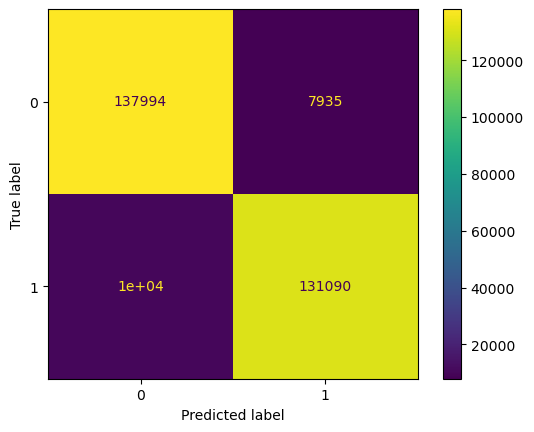

              precision    recall  f1-score   support

           0       0.93      0.95      0.94    145929
           1       0.94      0.93      0.93    141430

    accuracy                           0.94    287359
   macro avg       0.94      0.94      0.94    287359
weighted avg       0.94      0.94      0.94    287359



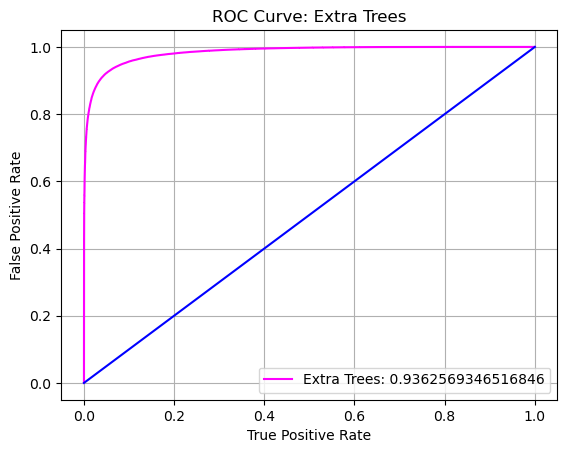

precision  accuracy   recall   roc_auc        f1
{train}   0.942924  0.936404  0.92689  0.936257  0.934838

In [315]:
model_evaluation(ytrain_full, train_pred, xtrain, set_type = 'train')

### Test Set

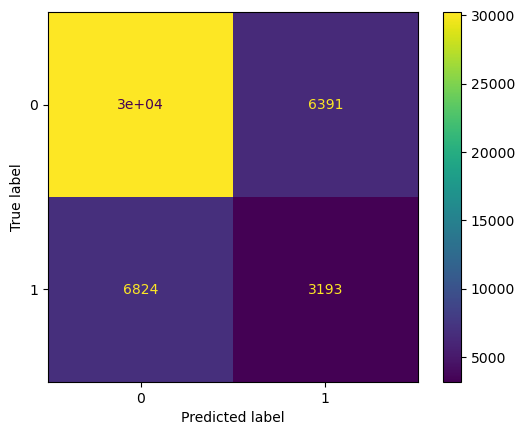

              precision    recall  f1-score   support

           0       0.82      0.83      0.82     36614
           1       0.33      0.32      0.33     10017

    accuracy                           0.72     46631
   macro avg       0.57      0.57      0.57     46631
weighted avg       0.71      0.72      0.71     46631



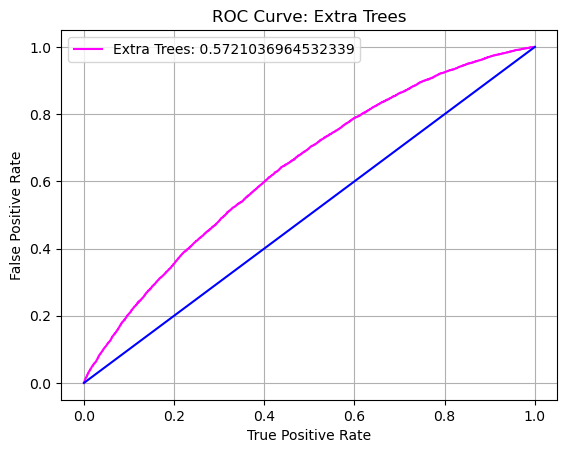

precision  accuracy    recall   roc_auc      f1
{test}   0.333159  0.716605  0.318758  0.572104  0.3258

In [316]:
test_pred = final_model.predict(xtest)
model_evaluation(ytest, test_pred, xtest, set_type = 'test')

Note: Model is Overfitting